In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns

In [2]:
pd.set_option('max_rows', 2000)

In [3]:
train = pd.read_csv('/Volumes/My Passport for Mac/train.csv')

In [4]:
train.head()

ip  app  device  os  channel           click_time attributed_time  \
0   83230    3       1  13      379  2017-11-06 14:32:21             NaN   
1   17357    3       1  19      379  2017-11-06 14:33:34             NaN   
2   35810    3       1  13      379  2017-11-06 14:34:12             NaN   
3   45745   14       1  13      478  2017-11-06 14:34:52             NaN   
4  161007    3       1  13      379  2017-11-06 14:35:08             NaN   

   is_attributed  
0              0  
1              0  
2              0  
3              0  
4              0

In [5]:
test = pd.read_csv('/Users/mengruiyin/Dropbox/project3/test.csv')

In [6]:
# sample_train.head()

In [6]:
def transform_date(df):
    df['day'] =  pd.DatetimeIndex(df['click_time']).day
    df['weekday'] = pd.DatetimeIndex(df['click_time']).weekday
    df['hour'] = pd.DatetimeIndex(df['click_time']).hour
    df['minutes'] = pd.DatetimeIndex(df['click_time']).minute
    df['seconds'] = pd.DatetimeIndex(df['click_time']).second
    return df

In [7]:
train = transform_date(train)

In [8]:
test = transform_date(test)

In [9]:
test.hour.unique()

array([ 4,  5,  6,  9, 10, 11, 13, 14, 15])

In [10]:
train.weekday.unique()

array([0, 1, 2, 3])

In [49]:
# sample_train = train[((train.weekday == 1) & (train.hour >= 13) & (train.minutes >= 1)) & ((train.weekday==1) & (train.hour <= 13) & (train.minutes <= 10 ))]

In [11]:
sample_train = train[((train.weekday == 1) & (train.hour >= 13)) & ((train.weekday==1) & (train.hour <= 15))]

In [13]:
import gc

In [14]:
gc.collect()

0

In [15]:
download = sample_train[sample_train.is_attributed == 1]

I plan to create 4 types of features: count, unique count, previous click-time and click-time range. 

In [16]:
def check_count(feature):
    download_feature = download[feature]
    
    keys = feature
    i1 = sample_train.set_index(keys).index
    i2 = download_feature.set_index(keys).index
    sample_yes = sample_train[i1.isin(i2)]
    sample_no = sample_train[~i1.isin(i2)]
    
    yes_idoa_count = sample_yes.groupby(feature, as_index = False)['is_attributed'].count()
    yes_idoa_count.rename(columns={"is_attributed": "count"}, inplace = True)
    
    no_idoa_count = sample_no.groupby(feature, as_index = False)['is_attributed'].count()
    no_idoa_count.rename(columns={"is_attributed": "count"}, inplace = True)
   
    return sample_yes, yes_idoa_count.sort_values('count'),  no_idoa_count.sort_values('count')

In [82]:
sel_train = sample_train[['ip', 'app', 'device', 'os', 'channel', 'click_time', 'is_attributed', 'day', 'hour', 'minutes', 'seconds']]

In [84]:
sel_train = sel_train.sort_values(['ip', 'app', 'device', 'os', 'channel', 'click_time', 'is_attributed'])

In [92]:
sel_train[sel_train.ip ==209]

ip  app  device   os  channel           click_time  is_attributed  \
8535947  209    1       1   17      349  2017-11-07 15:43:50              0   
3290210  209    1       1   19      134  2017-11-07 14:00:47              0   
6181788  209    1       1   19      135  2017-11-07 14:55:35              0   
4935155  209    1       1   19      153  2017-11-07 14:31:15              0   
6408661  209    1       1   19      153  2017-11-07 15:00:11              0   
1467609  209    1       1   22      377  2017-11-07 13:27:41              0   
2315993  209    1       1   48       17  2017-11-07 13:43:15              0   
1367545  209    1       2    6      153  2017-11-07 13:25:50              0   
4252269  209    2       1    3      477  2017-11-07 14:18:27              0   
7370655  209    2       1    6      401  2017-11-07 15:19:01              0   
780881   209    2       1    6      477  2017-11-07 13:14:46              0   
791875   209    2       1    6      477  2017-11-07 13:14:59              0   
816687   209    2       1    6      477  2017-11-07 13:15:28              0   
2187599  209    2       1    6      477  2017-11-07 13:40:54              0   
2197612  209    2       1    6      477  2017-11-07 13:41:05              0   
2206905  209    2       1    6      477  2017-11-07 13:41:15              0   
3310269  209    2       1    6      477  2017-11-07 14:01:07              0   
2714287  209    2       1   13      122  2017-11-07 13:50:34              0   
6991064  209    2       1   13      212  2017-11-07 15:11:23              0   
2714322  209    2       1   13      219  2017-11-07 13:50:34              0   
5263001  209    2       1   13      236  2017-11-07 14:37:36              0   
8528382  209    2       1   17      401  2017-11-07 15:43:40              0   
2953363  209    2       1   19      122  2017-11-07 13:54:54              0   
3452250  209    2       1   19      219  2017-11-07 14:03:44              0   
6172701  209    2       1   19      219  2017-11-07 14:55:25              0   
4484940  209    2       1   19      236  2017-11-07 14:22:45              0   
7600186  209    2       1   19      236  2017-11-07 15:23:42              0   
3408333  209    2       1   19      243  2017-11-07 14:02:54              0   
4960784  209    2       1   19      258  2017-11-07 14:31:43              0   
2019486  209    2       1   19      435  2017-11-07 13:37:48              0   
3130960  209    2       1   19      469  2017-11-07 13:58:07              0   
1458062  209    2       1   22      219  2017-11-07 13:27:31              0   
363761   209    2       1   37      377  2017-11-07 13:06:37              0   
2307698  209    2       1   48      219  2017-11-07 13:43:05              0   
19252    209    2       1   70      477  2017-11-07 13:00:17              0   
38880    209    2       1   70      477  2017-11-07 13:00:34              0   
7397897  209    3       1    6       19  2017-11-07 15:19:36              0   
7368867  209    3       1    6      442  2017-11-07 15:18:59              0   
1136377  209    3       1    8      280  2017-11-07 13:21:29              0   
1136480  209    3       1    8      280  2017-11-07 13:21:29              0   
7642827  209    3       1    9      137  2017-11-07 15:24:40              0   
7277778  209    3       1   13      280  2017-11-07 15:17:09              0   
2712409  209    3       1   13      409  2017-11-07 13:50:32              0   
2713648  209    3       1   13      480  2017-11-07 13:50:33              0   
8742025  209    3       1   15      280  2017-11-07 15:48:29              0   
8678602  209    3       1   16      280  2017-11-07 15:47:00              0   
1448054  209    3       1   17      280  2017-11-07 13:27:21              0   
8527222  209    3       1   17      409  2017-11-07 15:43:38              0   
7352792  209    3       1   18      280  2017-11-07 15:18:38              0   
3212626  209    3       1   19      115  2017-11-07 13:59:36

In [85]:
sel_train[sel_train.is_attributed == 1]

ip  app  device   os  channel           click_time  \
2565679      10   29       1   13      101  2017-11-07 13:47:51   
1450575      27   29       1   19      343  2017-11-07 13:27:24   
2289369      85   35       1   19       21  2017-11-07 13:42:45   
1912498     133   19    1214   24      213  2017-11-07 13:35:54   
1053878     147   18       1   19      439  2017-11-07 13:19:58   
540370      198   19       0   21      213  2017-11-07 13:10:06   
60830       198   19     338    0      213  2017-11-07 13:00:56   
3290253     209    8       1   19      145  2017-11-07 14:00:47   
4369618     222   19      33   29      213  2017-11-07 14:20:40   
2959792     232   19       0    0      213  2017-11-07 13:55:02   
3797768     246   29       1   19      101  2017-11-07 14:10:07   
4270812     268  107       1   19      171  2017-11-07 14:18:49   
5224276     301    3       1   19      137  2017-11-07 14:36:52   
3628293     315   35       1   19       21  2017-11-07 14:06:56   
4967509     391    9       1   19      215  2017-11-07 14:31:51   
6984982     403   19      18    0      213  2017-11-07 15:11:15   
1014826     407   35       1   13       21  2017-11-07 13:19:12   
279862      440   35       1   18       21  2017-11-07 13:05:08   
4699321     488   19       0   24      213  2017-11-07 14:26:52   
3078602     521   19       0   24      213  2017-11-07 13:57:11   
4517900     631   19     266   59      213  2017-11-07 14:23:22   
1322476     657   35       1   17      274  2017-11-07 13:24:59   
1587705     676   35       1   13       21  2017-11-07 13:29:57   
6336965     727   19       6   29      213  2017-11-07 14:58:45   
3486802     729   19     320   38      213  2017-11-07 14:04:25   
1434874     807   35       1    9      274  2017-11-07 13:27:06   
2430774     871   19       0   38      213  2017-11-07 13:45:22   
7326086     913   18       1   19      107  2017-11-07 15:18:06   
3426689     925   19       0   21      213  2017-11-07 14:03:15   
958537      944   35       1   10       21  2017-11-07 13:18:08   
110470      974   29       1   19      213  2017-11-07 13:01:51   
1103074     974   29       1   19      343  2017-11-07 13:20:52   
4004470    1036   29       1   19      343  2017-11-07 14:13:45   
5392260    1049   19       0   24      213  2017-11-07 14:40:07   
5908486    1082   19     204   38      213  2017-11-07 14:50:08   
1499178    1092   29       1   13      210  2017-11-07 13:28:16   
2727466    1108   19       0    0      213  2017-11-07 13:50:48   
5626121    1108   19       0  607      333  2017-11-07 14:44:40   
1064774    1117   19       0   24      210  2017-11-07 13:20:11   
4634016    1169   19     558   29      213  2017-11-07 14:25:37   
2973944    1176   19       0    0      213  2017-11-07 13:55:17   
2731233    1176   35       1   18       21  2017-11-07 13:50:53   
295497     1264   35       1   19      274  2017-11-07 13:05:25   
6427569    1290   19       8   38      213  2017-11-07 15:00:26   
48284      1292   35       1    3      274  2017-11-07 13:00:43   
607226     1292   35       1   13      274  2017-11-07 13:11:26   
1029638    1332   35       1   13      274  2017-11-07 13:19:29   
2417844    1337   72       1   13      101  2017-11-07 13:45:08   
2332383    1343   10       1   18      377  2017-11-07 13:43:32   
3638568    1370    9       1   19      134  2017-11-07 14:07:06   
5382370    1376    9       1   19      244  2017-11-07 14:39:56   
2111823    1393   35       1   13       21  2017-11-07 13:39:31   
456753     1395    3       1    6      137  2017-11-07 13:08:23   
3526091    1433    9       1   13      466  2017-11-07 14:05:10   
1394870    1439   35       1   13       21  2017-11-07 13:26:21   
4115569    1462   29       1   19      213  2017-11-07 14:15:53   
2268834    1462   35       1   19       21  2017-11-07 13:42:23   
2473355    1493   19       0    0      213  2017-11-07 13:46:09   
977163     1543    2       1   22      469  2017-11-07 13:18

##### ip

In [17]:
ip_yes, ip_yes_count, ip_no_count = check_count(['ip'])

In [18]:
ip_yes_count['count'].value_counts(normalize = True)

1         0.228597
2         0.142469
3         0.072495
4         0.041739
5         0.027848
6         0.018350
7         0.015378
8         0.011113
9         0.008981
11        0.007818
10        0.006655
12        0.006074
13        0.005169
16        0.004911
15        0.004652
17        0.004523
14        0.004458
18        0.004071
23        0.003812
19        0.003489
22        0.003166
20        0.002908
21        0.002778
27        0.002584
24        0.002584
31        0.002455
30        0.002326
77        0.002197
41        0.002132
33        0.002132
28        0.002132
47        0.002068
37        0.002068
29        0.001938
39        0.001874
34        0.001874
32        0.001809
26        0.001809
40        0.001680
49        0.001680
36        0.001680
50        0.001615
35        0.001615
25        0.001615
59        0.001551
52        0.001551
83        0.001486
67        0.001486
51        0.001486
46        0.001486
60        0.001486
64        0.001486
118       0.

In [479]:
ip_no_count['cout'].value_counts(normalize = True)

1       0.059862
2       0.041339
3       0.028052
4       0.023813
6       0.017312
5       0.017098
7       0.014534
8       0.014409
9       0.011434
10      0.011274
12      0.010081
11      0.009938
16      0.009653
15      0.009457
13      0.009279
17      0.009048
14      0.008977
18      0.008834
19      0.007676
20      0.007196
28      0.007178
22      0.007071
21      0.007035
23      0.006893
24      0.006768
31      0.006572
29      0.006519
30      0.006358
27      0.006287
26      0.006216
25      0.005967
39      0.005895
34      0.005878
33      0.005824
36      0.005735
32      0.005664
35      0.005628
40      0.005628
38      0.005593
42      0.005397
48      0.005343
46      0.005272
37      0.005076
44      0.005058
49      0.005023
50      0.004987
55      0.004791
51      0.004755
43      0.004738
58      0.004684
41      0.004666
52      0.004649
47      0.004649
53      0.004577
54      0.004435
45      0.004417
69      0.004310
61      0.004275
60      0.0042

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


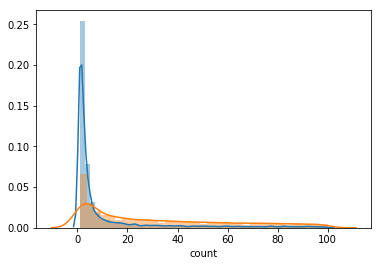

In [26]:
fig, ax = plt.subplots()
sns.distplot(ip_yes_count[ip_yes_count['count'] <= 100]['count'],ax = ax)
sns.distplot(ip_no_count[ip_no_count['count'] <= 100]['count'], ax = ax)

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


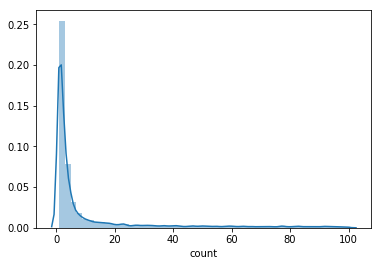

In [480]:
sns.distplot(ip_yes_count[ip_yes_count['count'] <= 100]['count'])

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


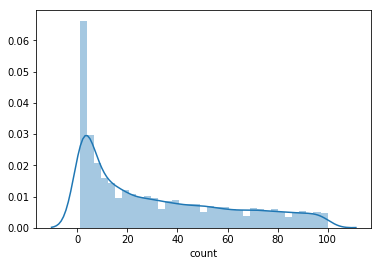

In [481]:
sns.distplot(ip_no_count[ip_no_count['count'] <= 100]['count'])

In [77]:
ip_yes.columns

Index(['ip', 'app', 'device', 'os', 'channel', 'click_time', 'attributed_time',
       'is_attributed', 'day', 'weekday', 'hour', 'minutes', 'seconds',
       'ip_count', 'app_count', 'os_count', 'channel_count', 'ipapp_count',
       'ipdevice_count', 'ipos_count', 'appdevice_count', 'appchannel_count',
       'appos_count', 'ida_count', 'ido_count', 'ioc_count', 'iac_count',
       'idoac_count'],
      dtype='object')

In [78]:
ip_yes = ip_yes[['ip', 'app', 'device', 'os', 'channel', 'click_time', 'is_attributed', 'day', 'hour', 'minutes', 'seconds']]

In [216]:
ip_yes.sort_values(['ip', 'device', 'os', 'app', 'channel', 'click_time', 'is_attributed'])

ip  app  device   os  channel           click_time  \
3944613      10   12       1    3      245  2017-11-07 14:12:42   
3943412      10   15       1    3      245  2017-11-07 14:12:41   
8188749      10    2       1   13      401  2017-11-07 15:36:17   
4948671      10    2       1   13      477  2017-11-07 14:31:30   
8188086      10    3       1   13      442  2017-11-07 15:36:16   
4744380      10   14       1   13      379  2017-11-07 14:27:42   
8189174      10   14       1   13      379  2017-11-07 15:36:17   
4740902      10   15       1   13      153  2017-11-07 14:27:38   
8187964      10   15       1   13      265  2017-11-07 15:36:16   
2565679      10   29       1   13      101  2017-11-07 13:47:51   
1617237      10    1       1   19      178  2017-11-07 13:30:31   
4970137      10    1       1   19      377  2017-11-07 14:31:54   
9166895      10    2       1   19      477  2017-11-07 15:57:56   
9215726      10    2       1   19      477  2017-11-07 15:59:00   
9229610      10    2       1   19      477  2017-11-07 15:59:18   
9235454      10    2       1   19      477  2017-11-07 15:59:25   
9259468      10    2       1   19      477  2017-11-07 15:59:57   
5889495      10    6       1   19      459  2017-11-07 14:49:45   
1617124      10   12       1   19      140  2017-11-07 13:30:31   
4981635      10   12       1   19      219  2017-11-07 14:32:07   
1618386      10   13       1   19      400  2017-11-07 13:30:32   
4955168      10   18       1   19      121  2017-11-07 14:31:37   
5889001      10   64       1   19      459  2017-11-07 14:49:44   
7162049      10   18       1   20      376  2017-11-07 15:14:47   
7282026      10   18       1   20      376  2017-11-07 15:17:14   
7946161      10   18       1   20      376  2017-11-07 15:31:04   
8355196      10   18       1   20      376  2017-11-07 15:39:54   
8461674      10   18       1   20      376  2017-11-07 15:42:17   
9105279      10   18       1   20      376  2017-11-07 15:56:28   
1826668      10   61       1   48       21  2017-11-07 13:34:22   
353654       10    1       1   49      153  2017-11-07 13:06:26   
353549       10   12       1   49      140  2017-11-07 13:06:26   
3011154      27    3       1    1      280  2017-11-07 13:55:58   
3012710      27    3       1    1      280  2017-11-07 13:55:59   
3011425      27   12       1    1      265  2017-11-07 13:55:58   
6695177      27    1       1   13      135  2017-11-07 15:05:31   
6689632      27    1       1   13      137  2017-11-07 15:05:24   
2595212      27    1       1   13      349  2017-11-07 13:48:23   
6681513      27    2       1   13      122  2017-11-07 15:05:14   
6681155      27    2       1   13      219  2017-11-07 15:05:14   
9254523      27    2       1   13      219  2017-11-07 15:59:51   
6972841      27    2       1   13      377  2017-11-07 15:11:00   
2586009      27    2       1   13      435  2017-11-07 13:48:13   
6964139      27    2       1   13      435  2017-11-07 15:10:49   
6984820      27    2       1   13      435  2017-11-07 15:11:15   
2660945      27    2       1   13      469  2017-11-07 13:49:33   
6709835      27    3       1   13       19  2017-11-07 15:05:48   
6740472      27    3       1   13      130  2017-11-07 15:06:22   
2659383      27    3       1   13      173  2017-11-07 13:49:32   
6984529      27    3       1   13      205  2017-11-07 15:11:14   
2585363      27    3       1   13      442  2017-11-07 13:48:12   
6972366      27    3       1   13      442  2017-11-07 15:10:59   
6679084      27    3       1   13      480  2017-11-07 15:05:12   
6963566      27    3       1   13      480  2017-11-07 15:10:48   
2625075      27    3       1   13      489  2017-11-07 13:48:54   
8044701      27    9       1   13      215  2017-11-07 15:33:07   
2651149      27    9       1   13      445  2017-11-07 13:49:22   
2653973      27   11       1   13      173  2017-11-07 13:49:26   
6734451      27   11       1   13      481  2017-11-07 15:06

##### app

In [482]:
app_yes, app_yes_count, app_no_count = check_count(['app'])

In [483]:
app_yes_count['count'].value_counts(normalize = True)

1          0.037313
10         0.022388
6          0.022388
32         0.022388
135        0.014925
43         0.014925
183        0.014925
35         0.014925
11         0.014925
100        0.014925
8          0.014925
4          0.014925
2          0.014925
74         0.007463
564        0.007463
5224       0.007463
310        0.007463
56         0.007463
57         0.007463
58         0.007463
43841      0.007463
582        0.007463
20489      0.007463
126259     0.007463
301390     0.007463
79         0.007463
161719     0.007463
88         0.007463
155737     0.007463
858        0.007463
348        0.007463
93         0.007463
95         0.007463
96         0.007463
331        0.007463
2010       0.007463
49         0.007463
312        0.007463
12         0.007463
1807       0.007463
24         0.007463
25         0.007463
26         0.007463
27         0.007463
69404      0.007463
29         0.007463
30         0.007463
7          0.007463
1069       0.007463
1287970    0.007463


In [484]:
app_yes_count['count'].value_counts(normalize = True)

1          0.037313
10         0.022388
6          0.022388
32         0.022388
135        0.014925
43         0.014925
183        0.014925
35         0.014925
11         0.014925
100        0.014925
8          0.014925
4          0.014925
2          0.014925
74         0.007463
564        0.007463
5224       0.007463
310        0.007463
56         0.007463
57         0.007463
58         0.007463
43841      0.007463
582        0.007463
20489      0.007463
126259     0.007463
301390     0.007463
79         0.007463
161719     0.007463
88         0.007463
155737     0.007463
858        0.007463
348        0.007463
93         0.007463
95         0.007463
96         0.007463
331        0.007463
2010       0.007463
49         0.007463
312        0.007463
12         0.007463
1807       0.007463
24         0.007463
25         0.007463
26         0.007463
27         0.007463
69404      0.007463
29         0.007463
30         0.007463
7          0.007463
1069       0.007463
1287970    0.007463


/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


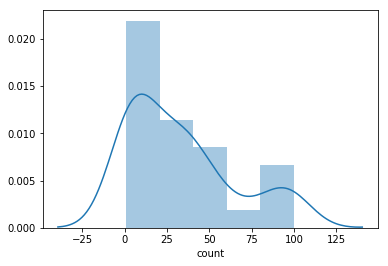

In [485]:
sns.distplot(app_yes_count[app_yes_count['count'] <= 100]['count'])

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


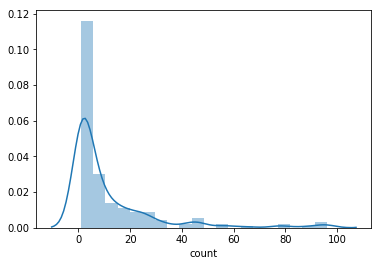

In [486]:
sns.distplot(app_no_count[app_no_count['count'] <= 100]['count'])

##### device

In [487]:
device_yes, device_yes_count, device_no_count = check_count(['device'])

In [488]:
device_yes_count['count'].value_counts(normalize = True)

2          0.110708
1          0.105263
3          0.079855
4          0.070780
6          0.065336
5          0.049002
7          0.039927
9          0.032668
8          0.025408
18         0.023593
10         0.021779
11         0.019964
27         0.019964
14         0.019964
13         0.016334
15         0.016334
16         0.016334
17         0.014519
25         0.010889
12         0.010889
24         0.009074
19         0.009074
28         0.009074
31         0.007260
29         0.007260
69         0.007260
23         0.007260
21         0.007260
53         0.005445
22         0.005445
26         0.005445
20         0.005445
33         0.005445
35         0.005445
54         0.003630
57         0.003630
64         0.003630
235        0.003630
70         0.003630
38         0.003630
37         0.003630
185        0.003630
30         0.003630
130        0.003630
34         0.001815
32         0.001815
39         0.001815
40         0.001815
41         0.001815
42         0.001815


In [489]:
device_no_count['count'].value_counts(normalize = True)

1      0.565766
2      0.200000
3      0.109910
4      0.043243
7      0.019820
5      0.014414
6      0.012613
10     0.009009
9      0.007207
13     0.003604
16     0.003604
8      0.001802
21     0.001802
11     0.001802
14     0.001802
20     0.001802
204    0.001802
Name: count, dtype: float64

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


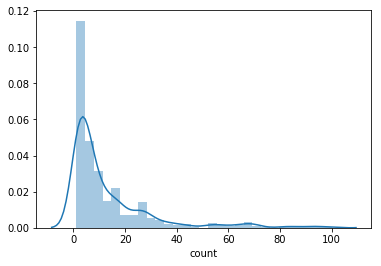

In [490]:
sns.distplot(device_yes_count[device_yes_count['count'] <= 100]['count'])

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


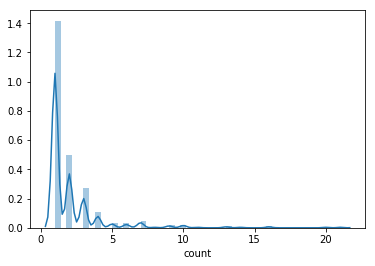

In [491]:
sns.distplot(device_no_count[device_no_count['count'] <= 100]['count'])

##### os

In [492]:
os_yes, os_yes_count, os_no_count = check_count(['os'])

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


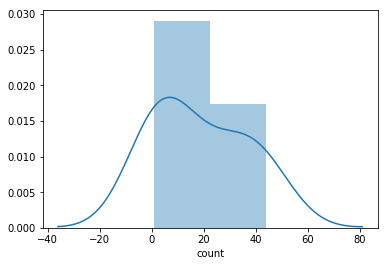

In [503]:
sns.distplot(os_yes_count[os_yes_count['count'] <= 100]['count'])

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


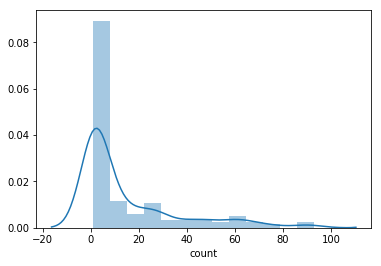

In [504]:
sns.distplot(os_no_count[os_no_count['count'] <= 100]['count'])

##### channel

In [505]:
channel_yes, channel_yes_count, channel_no_count = check_count(['channel'])

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


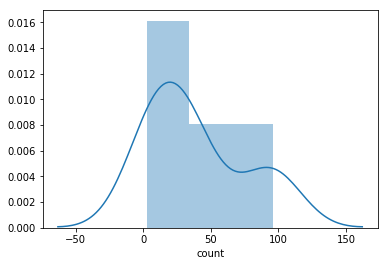

In [506]:
sns.distplot(channel_yes_count[channel_yes_count['count'] <= 100]['count'])

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


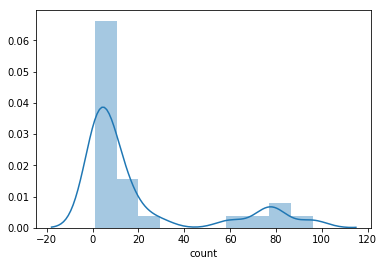

In [507]:
sns.distplot(channel_no_count[channel_no_count['count'] <= 100]['count'])

##### ip-app

In [394]:
ipapp_yes, ipapp_yes_count, ipapp_no_count = check_count(['ip', 'app'])

In [395]:
ipapp_yes_count['count'].value_counts(normalize = True)

1        0.476625
2        0.224270
3        0.095489
4        0.045463
5        0.024691
6        0.015856
7        0.010824
8        0.006963
9        0.005910
10       0.004622
12       0.003862
11       0.003511
15       0.002691
13       0.002574
16       0.002223
14       0.001989
17       0.001697
21       0.001346
19       0.001346
26       0.001229
29       0.001229
27       0.001170
18       0.001112
20       0.001112
28       0.001053
31       0.001053
34       0.000995
24       0.000995
23       0.000995
25       0.000936
22       0.000878
51       0.000819
32       0.000819
40       0.000819
33       0.000819
60       0.000819
46       0.000761
30       0.000761
43       0.000702
37       0.000702
41       0.000702
35       0.000644
36       0.000644
38       0.000585
45       0.000527
75       0.000527
56       0.000527
50       0.000527
47       0.000527
44       0.000468
59       0.000468
48       0.000468
42       0.000468
57       0.000468
49       0.000468
98       0

In [396]:
ipapp_no_count['count'].value_counts(normalize = True)

1        0.317548
2        0.151416
3        0.092772
4        0.066740
5        0.047254
6        0.039452
7        0.029896
8        0.025518
9        0.021157
10       0.018556
11       0.015764
12       0.014083
13       0.012192
14       0.010843
15       0.009595
16       0.008575
17       0.007661
18       0.007027
19       0.006105
20       0.005908
21       0.005180
22       0.004770
23       0.004356
24       0.004135
25       0.003658
26       0.003383
27       0.003152
28       0.002952
29       0.002728
31       0.002534
30       0.002464
32       0.002275
33       0.002069
34       0.001837
35       0.001814
36       0.001618
37       0.001606
38       0.001528
39       0.001398
40       0.001362
41       0.001219
42       0.001200
43       0.001115
44       0.001109
45       0.001020
46       0.000921
47       0.000905
48       0.000862
49       0.000795
51       0.000753
50       0.000745
52       0.000697
55       0.000686
54       0.000637
53       0.000627
56       0

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


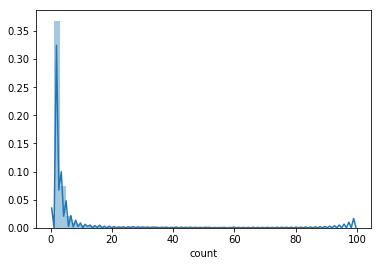

In [397]:
sns.distplot(ipapp_yes_count[ipapp_yes_count['count'] <= 100]['count'])

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


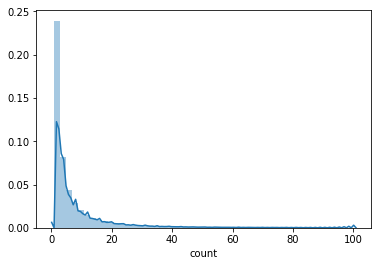

In [398]:
sns.distplot(ipapp_no_count[ipapp_no_count['count'] <= 100]['count'])

##### ip-device

In [27]:
ipdevice_yes, ipdevice_yes_count, ipdevice_no_count = check_count(['ip', 'device'])

In [400]:
ipdevice_yes_count['count'].value_counts(normalize = True)

1         0.332966
2         0.198872
3         0.089784
4         0.048906
5         0.028866
6         0.017528
7         0.012747
8         0.009438
9         0.006619
10        0.005516
11        0.005271
13        0.003616
12        0.003555
15        0.003064
14        0.003064
17        0.002574
22        0.002329
16        0.002206
19        0.002022
31        0.001716
23        0.001655
20        0.001593
18        0.001593
37        0.001532
27        0.001348
21        0.001287
35        0.001226
29        0.001164
33        0.001103
26        0.001103
32        0.001103
24        0.000981
25        0.000981
28        0.000919
88        0.000919
39        0.000919
84        0.000858
40        0.000858
102       0.000858
51        0.000858
83        0.000858
38        0.000858
45        0.000858
62        0.000797
50        0.000797
110       0.000797
59        0.000797
201       0.000797
34        0.000797
52        0.000797
47        0.000797
98        0.000797
119       0.

In [401]:
ipdevice_no_count['count'].value_counts(normalize = True)

1        0.219391
2        0.092944
3        0.049796
4        0.035173
5        0.023613
6        0.020692
7        0.017316
8        0.016235
9        0.012916
10       0.012309
11       0.010356
12       0.009417
13       0.008990
14       0.008848
15       0.008592
16       0.008165
17       0.007520
18       0.007416
19       0.006534
20       0.006164
21       0.005623
22       0.005576
23       0.005548
24       0.004941
28       0.004742
29       0.004723
27       0.004713
26       0.004571
25       0.004561
31       0.004514
34       0.004296
30       0.004286
32       0.004258
35       0.003917
33       0.003907
38       0.003888
40       0.003841
36       0.003746
37       0.003746
39       0.003670
42       0.003357
44       0.003338
43       0.003319
47       0.003300
46       0.003291
48       0.003205
45       0.003205
53       0.003082
55       0.003073
41       0.003063
49       0.003044
50       0.002968
65       0.002798
58       0.002750
61       0.002693
56       0

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'count groupby ip-device distributions')

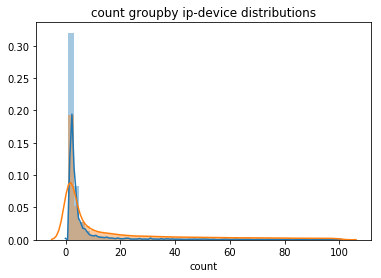

In [29]:
fig, ax = plt.subplots()
sns.distplot(ipdevice_yes_count[ipdevice_yes_count['count'] <= 100]['count'], ax = ax)
sns.distplot(ipdevice_no_count[ipdevice_no_count['count'] <= 100]['count'], ax = ax)
plt.title('count groupby ip-device distributions')

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


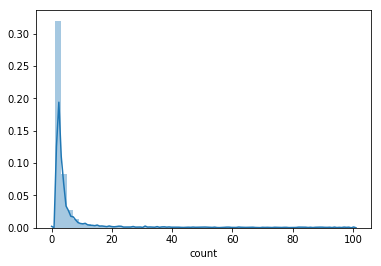

In [402]:
sns.distplot(ipdevice_yes_count[ipdevice_yes_count['count'] <= 100]['count'])

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


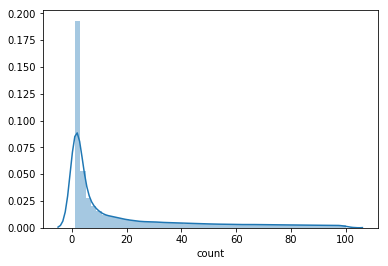

In [403]:
sns.distplot(ipdevice_no_count[ipdevice_no_count['count'] <= 100]['count'])

It looks like the distribution of click numbers for ip-device combination are different for the combination which has been used to download and the combination which has never been used to download the app. We could further check the combination which has clcik numbers below 20, so we could find some differences. 

##### ip-os

In [404]:
ipos_yes, ipos_yes_count, ipos_no_count = check_count(['ip', 'os'])

In [405]:
ipos_yes_count['count'].value_counts(normalize = True)

1        0.437444
2        0.185218
3        0.081812
4        0.041852
5        0.021928
6        0.013524
7        0.008960
8        0.007625
9        0.005677
10       0.004842
13       0.004397
11       0.004341
17       0.003339
20       0.003172
12       0.003172
15       0.003005
14       0.002838
23       0.002727
16       0.002727
26       0.002504
21       0.002226
29       0.002171
18       0.002171
19       0.002115
22       0.002115
24       0.002059
28       0.002004
35       0.001948
30       0.001892
42       0.001892
31       0.001892
40       0.001670
36       0.001614
57       0.001558
33       0.001558
34       0.001503
46       0.001447
43       0.001447
52       0.001447
25       0.001391
53       0.001336
50       0.001336
32       0.001336
38       0.001280
44       0.001224
39       0.001224
45       0.001169
49       0.001113
27       0.001113
56       0.001113
59       0.001057
47       0.001057
54       0.001002
55       0.000946
37       0.000946
41       0

In [406]:
ipos_no_count['count'].value_counts(normalize = True)

1       0.228446
2       0.144598
3       0.079542
4       0.063529
5       0.042552
6       0.039479
7       0.031696
8       0.028546
9       0.022947
10      0.021313
11      0.017559
12      0.016924
14      0.015708
13      0.015472
15      0.014698
16      0.013994
17      0.012297
18      0.010519
19      0.009039
20      0.008408
21      0.007519
22      0.007198
23      0.006648
24      0.006207
25      0.005618
26      0.005510
28      0.005140
27      0.005080
29      0.004878
30      0.004517
31      0.004332
32      0.003949
33      0.003606
34      0.003591
35      0.003353
36      0.003141
37      0.002903
38      0.002817
40      0.002566
39      0.002566
41      0.002325
42      0.002223
43      0.002131
44      0.002101
45      0.001975
46      0.001933
47      0.001722
48      0.001710
49      0.001641
50      0.001583
51      0.001519
54      0.001374
52      0.001318
53      0.001312
55      0.001249
56      0.001220
57      0.001127
59      0.001118
58      0.0011

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


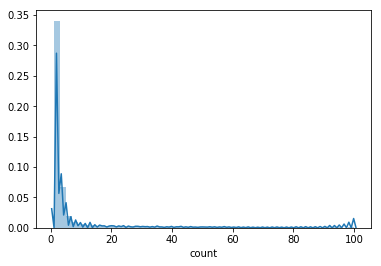

In [409]:
sns.distplot(ipos_yes_count[ipos_yes_count['count'] <= 100]['count'])

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


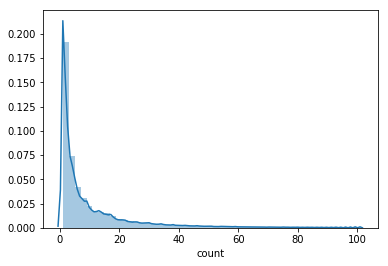

In [410]:
sns.distplot(ipos_no_count[ipos_no_count['count'] <= 100]['count'])

##### ip-channel

In [411]:
ipchannel_yes, ipchannel_yes_count, ipchannel_no_count = check_count(['ip', 'channel'])

In [412]:
ipchannel_yes_count['count'].value_counts(normalize = True)

1       0.439156
2       0.231360
3       0.109320
4       0.054865
5       0.030129
6       0.020164
7       0.015182
8       0.009144
9       0.007151
10      0.004982
11      0.003693
13      0.003400
14      0.002872
12      0.002755
16      0.002169
15      0.001993
18      0.001934
17      0.001817
19      0.001758
26      0.001407
24      0.001407
23      0.001407
25      0.001348
20      0.001290
21      0.001172
29      0.001114
27      0.001114
32      0.000879
22      0.000879
28      0.000821
33      0.000821
42      0.000821
35      0.000821
30      0.000821
31      0.000703
39      0.000645
34      0.000645
73      0.000645
37      0.000586
36      0.000528
40      0.000528
44      0.000469
60      0.000469
50      0.000469
59      0.000469
52      0.000410
46      0.000410
43      0.000410
48      0.000410
45      0.000410
41      0.000410
92      0.000352
72      0.000352
49      0.000352
57      0.000352
77      0.000352
56      0.000352
86      0.000352
63      0.0003

In [413]:
ipchannel_no_count['count'].value_counts(normalize = True)

1       4.160660e-01
2       1.951879e-01
3       1.105877e-01
4       6.795623e-02
5       4.397562e-02
6       3.172468e-02
7       2.233594e-02
8       1.675462e-02
9       1.286796e-02
10      1.025788e-02
11      8.121195e-03
12      6.710039e-03
13      5.423349e-03
14      4.611656e-03
15      4.009002e-03
16      3.438795e-03
17      3.057416e-03
18      2.735611e-03
19      2.327636e-03
20      2.126042e-03
21      1.869662e-03
22      1.742004e-03
23      1.538282e-03
24      1.437751e-03
25      1.263285e-03
26      1.171797e-03
27      1.043606e-03
28      9.781816e-04
29      9.138206e-04
30      8.420128e-04
31      7.797794e-04
32      7.366947e-04
33      7.015887e-04
34      6.223341e-04
35      5.749942e-04
36      5.297819e-04
37      4.866972e-04
38      4.712718e-04
39      4.239319e-04
40      4.218042e-04
41      3.920173e-04
42      3.569113e-04
43      3.452093e-04
44      3.361668e-04
45      3.116990e-04
46      3.101032e-04
48      2.638271e-04
49      2.627

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


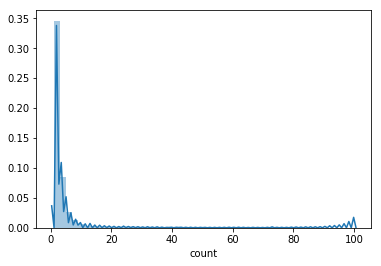

In [416]:
sns.distplot(ipchannel_yes_count[ipchannel_yes_count['count'] <= 100]['count'])

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


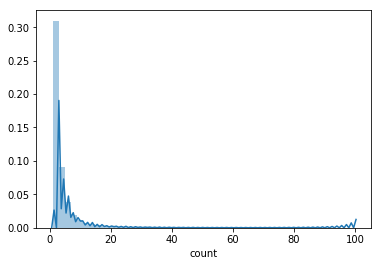

In [417]:
sns.distplot(ipchannel_no_count[ipchannel_no_count['count'] <= 100]['count'])

##### app-device

In [418]:
appdevice_yes, appdevice_yes_count, appdevice_no_count = check_count(['app', 'device'])

In [419]:
appdevice_yes_count['count'].value_counts(normalize = True)

1          0.213333
2          0.145556
3          0.073333
4          0.065556
5          0.046667
6          0.037778
7          0.021111
8          0.018889
10         0.018889
13         0.017778
9          0.015556
11         0.012222
12         0.012222
16         0.011111
15         0.011111
14         0.010000
25         0.008889
19         0.006667
27         0.006667
17         0.005556
18         0.005556
20         0.005556
21         0.005556
24         0.005556
32         0.004444
22         0.004444
23         0.004444
28         0.004444
43         0.004444
53         0.003333
34         0.003333
50         0.003333
30         0.003333
31         0.002222
26         0.002222
84         0.002222
101        0.002222
250        0.002222
72         0.002222
70         0.002222
67         0.002222
300        0.002222
64         0.002222
62         0.002222
60         0.002222
191        0.002222
55         0.002222
126        0.002222
29         0.002222
35         0.002222


In [420]:
appdevice_no_count['count'].value_counts(normalize = True)

1        0.571956
2        0.162889
3        0.065366
4        0.033737
5        0.017396
6        0.016869
8        0.011070
9        0.007380
7        0.006853
10       0.005799
11       0.004744
13       0.003690
43       0.003163
23       0.002636
15       0.002636
22       0.002636
12       0.002109
14       0.002109
17       0.002109
33       0.002109
27       0.001581
26       0.001581
24       0.001581
42       0.001581
16       0.001581
47       0.001054
19       0.001054
28       0.001054
76       0.001054
65       0.001054
460      0.001054
204      0.001054
89       0.000527
92       0.000527
93       0.000527
96       0.000527
100      0.000527
101      0.000527
104      0.000527
21       0.000527
8298     0.000527
82       0.000527
113      0.000527
114      0.000527
116      0.000527
120      0.000527
123      0.000527
124      0.000527
135      0.000527
137      0.000527
83       0.000527
74       0.000527
79       0.000527
139      0.000527
32       0.000527
18       0

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


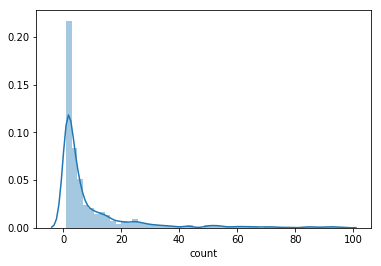

In [421]:
sns.distplot(appdevice_yes_count[appdevice_yes_count['count'] <= 100]['count'])

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


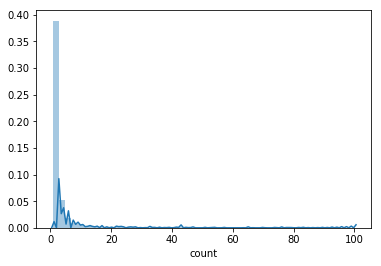

In [422]:
sns.distplot(appdevice_no_count[appdevice_no_count['count'] <= 100]['count'])

The distribution of click numbers for app-device combinations are not much different for the combination which were used to download the app and the combination which were never used for downloading. 

##### app-os

In [423]:
appos_yes, appos_yes_count, appos_no_count = check_count(['app', 'os'])

In [424]:
appos_yes_count['count'].value_counts(normalize = True)

1         0.067655
2         0.066728
3         0.050046
4         0.037071
5         0.031511
9         0.022243
8         0.021316
6         0.017609
7         0.013902
10        0.012975
12        0.012975
11        0.010195
17        0.009268
14        0.009268
16        0.008341
19        0.008341
13        0.008341
20        0.007414
23        0.007414
27        0.006487
25        0.006487
26        0.006487
52        0.005561
18        0.005561
39        0.005561
33        0.005561
32        0.005561
42        0.004634
47        0.004634
15        0.004634
28        0.004634
24        0.004634
57        0.004634
40        0.004634
51        0.003707
48        0.003707
46        0.003707
67        0.003707
35        0.003707
38        0.003707
36        0.003707
21        0.003707
34        0.003707
31        0.003707
29        0.003707
22        0.003707
55        0.002780
80        0.002780
86        0.002780
92        0.002780
60        0.002780
59        0.002780
58        0.

In [425]:
appos_no_count['count'].value_counts(normalize = True)

1        0.247310
2        0.110602
3        0.053607
4        0.045436
5        0.032084
6        0.027302
7        0.023515
8        0.017935
9        0.016939
10       0.015743
11       0.012356
12       0.012156
13       0.008569
17       0.008370
14       0.008370
15       0.007772
16       0.007573
18       0.006975
21       0.006178
22       0.005580
24       0.005381
23       0.005181
19       0.004783
26       0.004583
39       0.004185
20       0.004185
31       0.003986
25       0.003986
27       0.003388
40       0.003388
32       0.002790
28       0.002790
29       0.002591
42       0.002591
36       0.002591
35       0.002591
41       0.002391
34       0.002391
43       0.002391
37       0.002391
38       0.002192
33       0.001794
45       0.001794
48       0.001794
46       0.001594
44       0.001594
47       0.001594
54       0.001594
51       0.001395
91       0.001395
73       0.001196
67       0.001196
106      0.001196
53       0.001196
30       0.001196
74       0

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


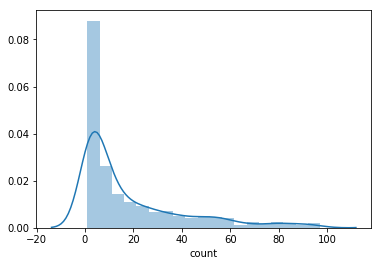

In [426]:
sns.distplot(appos_yes_count[appos_yes_count['count'] <= 100]['count'])

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


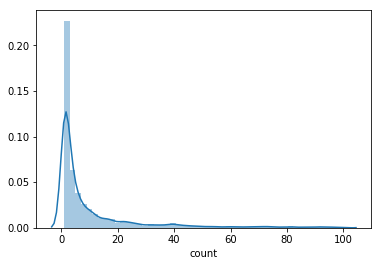

In [427]:
sns.distplot(appos_no_count[appos_no_count['count'] <= 100]['count'])

##### app channel

In [432]:
appchannel_yes, appchannel_yes_count, appchannel_no_count = check_count(['app', 'channel'])

In [433]:
appchannel_yes_count['count'].value_counts(normalize = True)

1         0.024242
2         0.018182
8         0.015152
6         0.015152
5         0.012121
17        0.012121
10        0.012121
24        0.012121
4         0.009091
42        0.009091
9         0.009091
11        0.009091
31        0.009091
638       0.009091
25        0.009091
43        0.006061
69        0.006061
49        0.006061
38        0.006061
96        0.006061
63        0.006061
190       0.006061
20        0.006061
21        0.006061
18        0.006061
15        0.006061
3         0.006061
102       0.006061
66        0.006061
135       0.006061
12        0.006061
13        0.006061
146058    0.003030
214536    0.003030
140       0.003030
139       0.003030
1165      0.003030
26766     0.003030
56841     0.003030
3101      0.003030
31858     0.003030
65333     0.003030
49679     0.003030
126       0.003030
161588    0.003030
633       0.003030
120       0.003030
119       0.003030
118       0.003030
113       0.003030
112       0.003030
18030     0.003030
148       0.

In [434]:
appchannel_no_count['count'].value_counts(normalize = True)

1        0.209877
2        0.078189
3        0.049383
4        0.037037
6        0.028807
7        0.024691
9        0.020576
13       0.016461
10       0.014403
15       0.014403
26       0.014403
8        0.014403
5        0.014403
12       0.012346
16       0.012346
11       0.012346
25       0.008230
46       0.008230
27       0.008230
204      0.006173
60       0.006173
31       0.006173
80       0.006173
22       0.006173
19       0.006173
17       0.006173
134      0.004115
63       0.004115
18       0.004115
24       0.004115
115      0.004115
188      0.004115
55       0.004115
96       0.004115
43       0.004115
14       0.004115
94       0.004115
87       0.004115
85       0.004115
79       0.004115
44       0.004115
33       0.004115
42       0.004115
28       0.004115
135      0.004115
38       0.004115
37       0.004115
20       0.004115
36       0.004115
326      0.004115
41       0.004115
34       0.004115
82       0.004115
154      0.004115
88       0.002058
1044     0

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


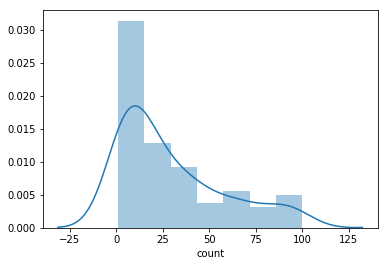

In [435]:
sns.distplot(appchannel_yes_count[appchannel_yes_count['count'] <= 100]['count'])

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


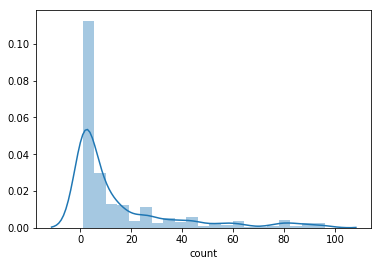

In [436]:
sns.distplot(appchannel_no_count[appchannel_no_count['count'] <= 100]['count'])

##### ip-device-app

In [437]:
ida_yes, ida_yes_count, ida_no_count = check_count(['ip', 'device', 'app'])

In [438]:
ida_yes_count['count'].value_counts(normalize = True)

1        0.497324
2        0.223942
3        0.093007
4        0.041957
5        0.022446
6        0.013755
7        0.008921
8        0.006619
9        0.005237
10       0.004029
11       0.003338
12       0.003281
13       0.002647
15       0.001957
16       0.001957
14       0.001612
17       0.001439
21       0.001381
24       0.001324
27       0.001324
18       0.001209
20       0.001209
19       0.001094
23       0.001094
34       0.001036
26       0.001036
25       0.000978
28       0.000978
40       0.000978
22       0.000921
41       0.000921
30       0.000806
33       0.000806
29       0.000806
46       0.000748
44       0.000748
36       0.000748
42       0.000691
60       0.000691
32       0.000691
35       0.000633
57       0.000633
38       0.000633
31       0.000633
47       0.000633
63       0.000576
51       0.000576
56       0.000518
45       0.000518
37       0.000518
43       0.000460
89       0.000460
52       0.000460
62       0.000460
50       0.000460
39       0

In [439]:
ida_no_count['count'].value_counts(normalize = True)

1        0.331579
2        0.152684
3        0.092258
4        0.065900
5        0.046704
6        0.038790
7        0.029430
8        0.024967
9        0.020756
10       0.018153
11       0.015296
12       0.013482
13       0.011807
14       0.010415
15       0.009175
16       0.008225
17       0.007334
18       0.006785
19       0.005829
20       0.005646
21       0.004989
22       0.004487
23       0.004048
24       0.003763
25       0.003451
26       0.003168
27       0.003002
28       0.002788
29       0.002601
31       0.002440
30       0.002334
32       0.002082
33       0.001886
34       0.001715
35       0.001625
36       0.001571
37       0.001462
38       0.001385
39       0.001282
40       0.001260
41       0.001116
42       0.001062
43       0.001020
44       0.000988
45       0.000950
46       0.000853
47       0.000818
48       0.000772
49       0.000721
50       0.000716
51       0.000657
52       0.000623
55       0.000613
53       0.000591
54       0.000590
56       0

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


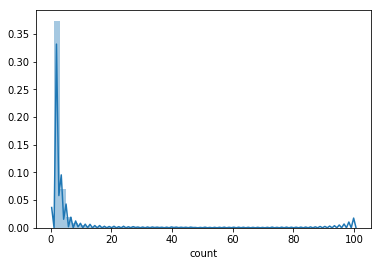

In [440]:
sns.distplot(ida_yes_count[ida_yes_count['count'] <= 100]['count'])

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


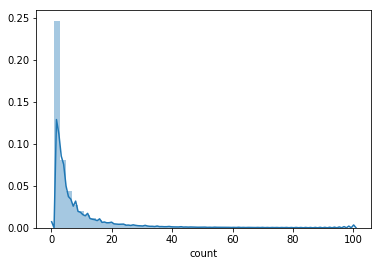

In [441]:
sns.distplot(ida_no_count[ida_no_count['count'] <= 100]['count'])

##### ip-device-os

In [442]:
ido_yes, ido_yes_count, ido_no_count = check_count(['ip', 'device', 'os'])

In [443]:
ido_yes_count['count'].value_counts(normalize = True)

1        0.450259
2        0.185067
3        0.079850
4        0.039815
5        0.021065
6        0.012463
7        0.008217
8        0.007003
9        0.005184
11       0.004356
13       0.004301
10       0.004246
17       0.003419
12       0.003254
20       0.003198
15       0.002592
14       0.002592
23       0.002537
16       0.002482
26       0.002316
18       0.002261
35       0.002206
19       0.002206
31       0.002206
21       0.002151
22       0.002040
24       0.002040
30       0.001985
29       0.001820
28       0.001765
42       0.001709
25       0.001544
46       0.001544
32       0.001489
45       0.001489
52       0.001434
38       0.001434
33       0.001434
34       0.001379
36       0.001379
57       0.001323
40       0.001323
55       0.001323
43       0.001323
37       0.001323
39       0.001213
53       0.001213
59       0.001213
50       0.001158
47       0.001048
27       0.001048
41       0.001048
54       0.001048
56       0.000993
83       0.000882
48       0

In [444]:
ido_no_count['count'].value_counts(normalize = True)

1       0.238834
2       0.147933
3       0.081142
4       0.064177
5       0.042786
6       0.039435
7       0.031634
8       0.028243
9       0.022800
10      0.020965
11      0.017163
12      0.016488
14      0.015278
13      0.015091
15      0.014088
16      0.013535
17      0.011658
18      0.010158
19      0.008487
20      0.008030
21      0.007218
22      0.006838
23      0.006290
24      0.005902
25      0.005420
26      0.005235
27      0.004855
28      0.004840
29      0.004542
30      0.004278
31      0.004077
32      0.003763
33      0.003419
34      0.003397
35      0.003113
36      0.002965
37      0.002731
38      0.002659
40      0.002412
39      0.002356
41      0.002200
42      0.002101
44      0.001995
43      0.001952
46      0.001845
45      0.001838
48      0.001593
47      0.001580
49      0.001509
50      0.001434
51      0.001418
54      0.001291
52      0.001244
55      0.001197
53      0.001186
56      0.001123
57      0.001062
58      0.001010
59      0.0009

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


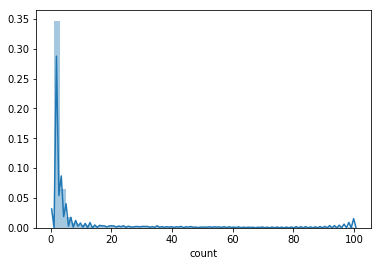

In [445]:
sns.distplot(ido_yes_count[ido_yes_count['count'] <= 100]['count'])

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


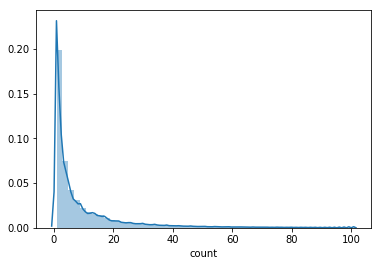

In [447]:
sns.distplot(ido_no_count[ido_no_count['count'] <= 100]['count'])

##### ip-os-app

In [448]:
ioa_yes, ioa_yes_count, ioa_no_count = check_count(['ip', 'os', 'app'])

In [449]:
ioa_yes_count['count'].value_counts(normalize = True)

1       0.573635
2       0.202498
3       0.081010
4       0.039078
5       0.019755
6       0.013618
7       0.007751
8       0.005760
9       0.004360
10      0.004252
11      0.002638
13      0.002422
12      0.002261
14      0.002045
16      0.001776
17      0.001561
18      0.001400
19      0.001400
15      0.001292
24      0.001184
20      0.001130
21      0.001077
23      0.000807
29      0.000592
22      0.000592
28      0.000592
31      0.000592
26      0.000538
30      0.000538
27      0.000538
41      0.000484
39      0.000484
46      0.000484
72      0.000431
25      0.000431
35      0.000431
32      0.000431
38      0.000431
43      0.000377
34      0.000377
40      0.000377
47      0.000377
51      0.000323
42      0.000323
61      0.000323
36      0.000323
64      0.000323
62      0.000323
63      0.000323
44      0.000269
54      0.000269
110     0.000269
82      0.000215
58      0.000215
49      0.000215
37      0.000215
52      0.000215
57      0.000215
45      0.0002

In [450]:
ioa_no_count['count'].value_counts(normalize = True)

1       5.537301e-01
2       1.800494e-01
3       8.634288e-02
4       4.770046e-02
5       2.936470e-02
6       2.204869e-02
7       1.441304e-02
8       1.097453e-02
9       8.217464e-03
10      6.493789e-03
11      5.208429e-03
12      4.201904e-03
13      3.452110e-03
14      2.863837e-03
15      2.413621e-03
16      2.073918e-03
17      1.816166e-03
18      1.540392e-03
19      1.373771e-03
20      1.205110e-03
21      1.045970e-03
22      9.425974e-04
23      8.310636e-04
24      7.314311e-04
25      6.872256e-04
26      6.192172e-04
27      5.491684e-04
28      5.042828e-04
29      4.641578e-04
31      4.566769e-04
30      4.430752e-04
32      3.485434e-04
33      3.424227e-04
34      3.029778e-04
35      2.750943e-04
36      2.489110e-04
37      2.268083e-04
38      2.254481e-04
40      2.019852e-04
39      2.009650e-04
41      1.856631e-04
42      1.768220e-04
43      1.622002e-04
44      1.543792e-04
46      1.366970e-04
45      1.336367e-04
47      1.298962e-04
48      1.196

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


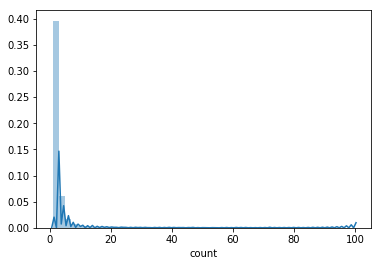

In [452]:
sns.distplot(ioa_yes_count[ioa_yes_count['count'] <= 100]['count'])

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


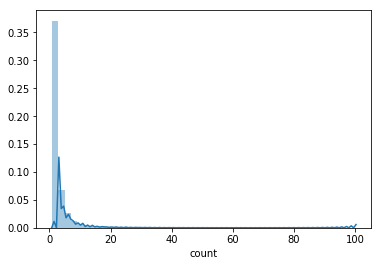

In [453]:
sns.distplot(ioa_no_count[ioa_no_count['count'] <= 100]['count'])

##### ip-os-channel

In [454]:
ioc_yes, ioc_yes_count, ioc_no_count = check_count(['ip', 'os', 'channel'])

In [455]:
ioc_yes_count['count'].value_counts(normalize = True)

1       0.573340
2       0.217317
3       0.087173
4       0.038369
5       0.019158
6       0.011398
7       0.007064
8       0.005351
9       0.003853
10      0.003104
11      0.002033
12      0.001980
13      0.001873
15      0.001552
14      0.001070
21      0.001070
17      0.001017
19      0.000856
18      0.000749
16      0.000749
20      0.000696
22      0.000696
34      0.000642
25      0.000589
27      0.000535
31      0.000535
36      0.000535
33      0.000482
23      0.000428
26      0.000428
30      0.000375
28      0.000375
24      0.000375
59      0.000321
64      0.000321
49      0.000268
32      0.000268
44      0.000268
52      0.000268
29      0.000268
61      0.000214
35      0.000214
37      0.000214
74      0.000214
47      0.000214
43      0.000214
56      0.000161
122     0.000161
42      0.000161
48      0.000161
55      0.000161
39      0.000161
72      0.000161
184     0.000161
116     0.000161
46      0.000161
69      0.000161
130     0.000161
97      0.0001

In [456]:
ioc_no_count['count'].value_counts(normalize = True)

1       6.592368e-01
2       1.763483e-01
3       6.604104e-02
4       3.219227e-02
5       1.634197e-02
6       1.197092e-02
7       6.853199e-03
8       5.472141e-03
9       3.598935e-03
10      3.116777e-03
11      2.158171e-03
12      1.943139e-03
13      1.456225e-03
14      1.364883e-03
15      1.025684e-03
16      9.671691e-04
17      7.664089e-04
18      7.483310e-04
19      6.003774e-04
20      5.630323e-04
22      4.605114e-04
21      4.505210e-04
23      3.617964e-04
24      3.603692e-04
26      3.108928e-04
25      2.942420e-04
28      2.549939e-04
27      2.535667e-04
31      2.186002e-04
30      2.124156e-04
29      2.074204e-04
32      1.867259e-04
34      1.667451e-04
33      1.615120e-04
35      1.391525e-04
37      1.308271e-04
36      1.296378e-04
38      1.205988e-04
39      1.084676e-04
40      1.084676e-04
42      1.029966e-04
41      9.586058e-05
43      8.991390e-05
44      8.729735e-05
46      8.158854e-05
45      7.564185e-05
47      6.636502e-05
48      6.493

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


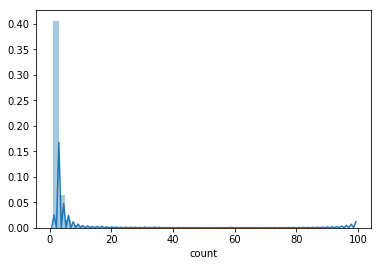

In [457]:
sns.distplot(ioc_yes_count[ioc_yes_count['count'] <= 100]['count'])

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


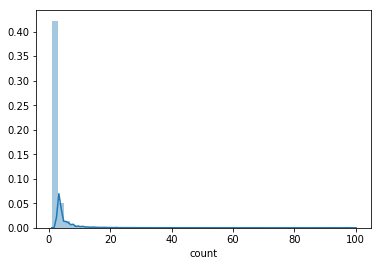

In [458]:
sns.distplot(ioc_no_count[ioc_no_count['count'] <= 100]['count'])

##### ip-app-channel

In [459]:
iac_yes, iac_yes_count, iac_no_count = check_count(['ip', 'app', 'channel'])

In [460]:
iac_yes_count['count'].value_counts(normalize = True)

1       0.507796
2       0.228454
3       0.095437
4       0.045234
5       0.024102
6       0.014107
7       0.009367
8       0.006797
9       0.005197
10      0.004226
12      0.003255
11      0.002913
13      0.002799
14      0.002056
15      0.001713
19      0.001485
23      0.001428
17      0.001371
24      0.001314
20      0.001199
18      0.001199
21      0.000971
16      0.000857
28      0.000800
22      0.000742
25      0.000742
50      0.000685
31      0.000685
27      0.000685
29      0.000628
32      0.000628
30      0.000628
33      0.000571
39      0.000571
35      0.000514
34      0.000514
43      0.000514
46      0.000514
37      0.000514
38      0.000514
49      0.000514
47      0.000514
26      0.000457
58      0.000457
59      0.000457
114     0.000400
42      0.000400
36      0.000400
86      0.000343
87      0.000343
44      0.000286
61      0.000286
66      0.000286
41      0.000286
67      0.000286
68      0.000286
65      0.000286
63      0.000286
52      0.0002

In [461]:
iac_no_count['count'].value_counts(normalize = True)

1       5.176546e-01
2       1.966058e-01
3       9.591221e-02
4       5.217124e-02
5       3.107030e-02
6       2.187435e-02
7       1.449126e-02
8       1.090300e-02
9       8.165765e-03
10      6.608910e-03
11      5.018076e-03
12      4.300271e-03
13      3.446163e-03
14      3.046138e-03
15      2.477376e-03
16      2.171565e-03
17      1.899347e-03
18      1.636010e-03
19      1.429820e-03
20      1.286181e-03
21      1.140612e-03
22      1.030953e-03
23      8.799782e-04
24      8.533356e-04
25      7.228254e-04
26      6.811239e-04
27      6.436699e-04
28      6.135521e-04
31      5.313076e-04
29      5.251296e-04
30      5.046650e-04
32      4.359348e-04
33      3.899859e-04
34      3.714519e-04
35      3.386314e-04
36      3.312950e-04
38      2.996328e-04
37      2.988605e-04
39      2.525255e-04
40      2.513672e-04
42      2.239523e-04
41      2.189327e-04
43      2.000126e-04
46      1.861121e-04
44      1.814786e-04
45      1.764590e-04
47      1.706671e-04
48      1.540

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


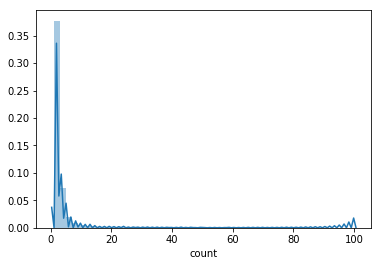

In [463]:
sns.distplot(iac_yes_count[iac_yes_count['count'] <= 100]['count'])

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


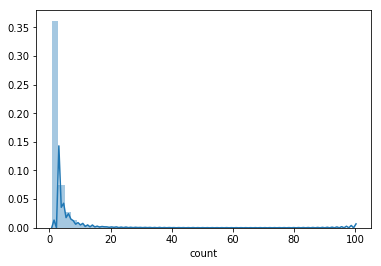

In [464]:
sns.distplot(iac_no_count[iac_no_count['count'] <= 100]['count'])

##### ip-device-os-app

In [467]:
idoa_yes, idoa_yes_count, idoa_no_count = check_count(['ip', 'device', 'os', 'app'])

In [468]:
idoa_yes_count['count'].value_counts(normalize = True)

1       0.583738
2       0.203590
3       0.079385
4       0.038303
5       0.019232
6       0.011966
7       0.007319
8       0.004968
9       0.004113
10      0.003366
11      0.002778
12      0.002137
13      0.002030
14      0.001923
16      0.001442
15      0.001389
17      0.001389
18      0.001282
20      0.001175
19      0.001175
21      0.001068
24      0.000908
26      0.000694
31      0.000641
22      0.000588
30      0.000534
37      0.000534
34      0.000481
28      0.000481
23      0.000481
29      0.000481
40      0.000427
35      0.000427
47      0.000427
27      0.000427
41      0.000374
46      0.000374
38      0.000374
43      0.000321
32      0.000321
44      0.000267
60      0.000267
72      0.000267
61      0.000214
58      0.000214
48      0.000214
33      0.000214
49      0.000214
36      0.000214
52      0.000214
100     0.000214
53      0.000214
62      0.000214
25      0.000214
42      0.000214
110     0.000214
76      0.000214
39      0.000160
54      0.0001

In [469]:
idoa_no_count['count'].value_counts(normalize = True)

1       5.603964e-01
2       1.796588e-01
3       8.541285e-02
4       4.686355e-02
5       2.873704e-02
6       2.150837e-02
7       1.398252e-02
8       1.064073e-02
9       7.945168e-03
10      6.273780e-03
11      4.980671e-03
12      4.030048e-03
13      3.319790e-03
14      2.747775e-03
15      2.325495e-03
16      2.007307e-03
17      1.706523e-03
18      1.491771e-03
19      1.276363e-03
20      1.140419e-03
21      1.017609e-03
22      8.875760e-04
23      7.821702e-04
24      7.164968e-04
25      6.383455e-04
26      5.651196e-04
27      5.178348e-04
28      4.876250e-04
29      4.478926e-04
31      4.212949e-04
30      4.150559e-04
32      3.303372e-04
33      3.208146e-04
34      2.774701e-04
35      2.577681e-04
36      2.341257e-04
37      2.157371e-04
38      2.157371e-04
40      1.911096e-04
39      1.750196e-04
41      1.717359e-04
42      1.681239e-04
43      1.586013e-04
45      1.421829e-04
44      1.339737e-04
46      1.244511e-04
47      1.109880e-04
48      1.093

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


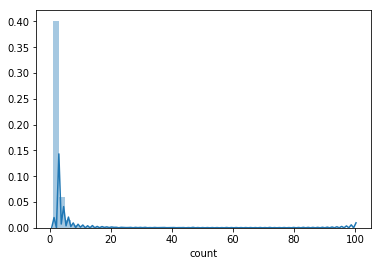

In [470]:
sns.distplot(idoa_yes_count[idoa_yes_count['count'] <= 100]['count'])

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


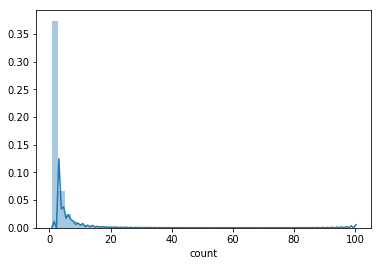

In [471]:
sns.distplot(idoa_no_count[idoa_no_count['count'] <= 100]['count'])

For this combination, it has a lot of clicks, so I check for the click which was used to download the app, its channel was different than others. So I will check the combination of ip, device, os, app, channel.

##### ip-device-os-app-channel

In [473]:
idoac_yes, idoac_yes_count, idoac_no_count = check_count(['ip', 'device', 'os', 'app', 'channel'])

In [466]:
idoac_yes_count['count'].value_counts(normalize = True)

index  count
0        1  11625
1        2   3885
2        3   1481
3        4    656
4        5    319
5        6    190
6        7    116
7        8     78
8        9     62
9       10     46
10      11     35
11      12     30
12      13     22
13      14     21
14      15     19
15      19     14
16      18     13
17      21     11
18      17     11
19      30     10
20      20     10
21      23     10
22      24      9
23      25      8
24      27      7
25      16      7
26      29      6
27      33      6
28      22      6
29      31      6
30      61      5
31      35      5
32      43      5
33      64      5
34      36      4
35      26      4
36      37      4
37      52      4
38      28      3
39      50      3
40      32      3
41      79      3
42      53      3
43      71      3
44      44      3
45     105      3
46      42      3
47      66      3
48     124      3
49      34      3
50      59      3
51      88      2
52     787      2
53      70      2
54      62      2
55      67      2
56      46      2
57      49      2
58      40      2
59      56      2
60      77      2
61     118      2
62     190      2
63     114      2
64      69      2
65      47      2
66      90      2
67      74      2
68      80      1
69     128      1
70     147      1
71     304      1
72     753      1
73     977      1
74     131      1
75     243      1
76     307      1
77      48      1
78      84      1
79      51      1
80      99      1
81      83      1
82    1328      1
83      98      1
84      65      1
85     513      1
86     370      1
87     322      1
88     129      1
89     177      1
90     258      1
91     449      1
92     225      1
93     385      1
94     130      1
95      81      1
96     239      1
97     468      1
98      91      1
99      76      1
100     92      1
101    140      1
102    188      1
103    252      1
104    332      1
105    412      1
106     45      1
107    109      1
108    237      1
109    269      1
110    493      1
111    637      1
112    909      1
113     78      1
114    110      1
115    142      1
116    174      1
117    302      1
118    318      1
119    111      1
120    123      1
121    506      1
122     85      1
123    394      1
124    101      1
125    117      1
126    181      1
127    325      1
128    485      1
129     54      1
130     86      1
131    150      1
132    230      1
133    127      1
134     55      1
135    167      1
136    231      1
137     72      1
138    104      1
139    120      1
140     41      1
141     58      1
142    106      1
143    170      1
144    298      1
145     39      1

In [474]:
idoac_no_count['count'].value_counts(normalize = True)

1       7.395931e-01
2       1.402021e-01
3       5.096707e-02
4       2.239553e-02
5       1.181648e-02
6       8.466985e-03
7       4.915864e-03
8       3.685603e-03
9       2.681471e-03
10      2.100509e-03
11      1.630121e-03
12      1.343425e-03
13      1.091595e-03
14      9.128836e-04
15      7.813901e-04
16      6.728083e-04
17      5.644258e-04
18      4.958898e-04
19      4.359208e-04
20      3.781434e-04
21      3.444731e-04
22      3.110020e-04
23      2.751402e-04
24      2.418683e-04
25      2.207497e-04
26      2.062057e-04
27      1.870794e-04
28      1.793093e-04
31      1.665584e-04
29      1.567960e-04
30      1.428497e-04
32      1.269111e-04
33      1.067887e-04
34      1.032025e-04
35      9.762395e-05
37      9.005312e-05
36      8.148612e-05
38      7.869686e-05
39      7.152449e-05
40      6.534828e-05
42      6.534828e-05
41      6.295749e-05
44      5.538665e-05
43      5.518742e-05
45      5.518742e-05
46      4.861274e-05
47      4.542502e-05
48      4.303

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


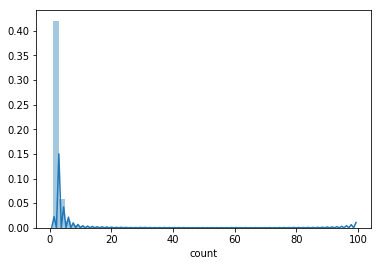

In [475]:
sns.distplot(idoac_yes_count[idoac_yes_count['count'] <= 100]['count'])

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


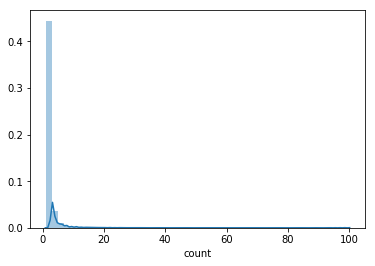

In [476]:
sns.distplot(idoac_no_count[idoac_no_count['count'] <= 100]['count'])

count feature
* ip, app, os, channel
* ip, app
* ip, device
* ip, os
* app, device
* app, channel
* app, os
* ip, device, app
* ip, device, os
* ip, os, channel
* ip, app, channel
* ip, device, os, app, channel

In [509]:
sample_train['ip_count'] = sample_train.groupby(['ip'])['is_attributed'].transform('count')

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [512]:
sample_train['app_count'] = sample_train.groupby(['app'])['is_attributed'].transform('count')
sample_train['os_count'] = sample_train.groupby(['os'])['is_attributed'].transform('count')
sample_train['channel_count'] = sample_train.groupby(['channel'])['is_attributed'].transform('count')

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/p

In [514]:
sample_train['ipapp_count'] = sample_train.groupby(['ip', 'app'])['is_attributed'].transform('count')
sample_train['ipdevice_count'] = sample_train.groupby(['ip', 'device'])['is_attributed'].transform('count')
sample_train['ipos_count'] = sample_train.groupby(['ip', 'os'])['is_attributed'].transform('count')

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/p

In [515]:
sample_train['appdevice_count'] = sample_train.groupby(['app', 'device'])['is_attributed'].transform('count')
sample_train['appchannel_count'] = sample_train.groupby(['app', 'channel'])['is_attributed'].transform('count')
sample_train['appos_count'] = sample_train.groupby(['app', 'os'])['is_attributed'].transform('count')

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/p

In [516]:
sample_train['ida_count'] = sample_train.groupby(['ip', 'device', 'app'])['is_attributed'].transform('count')
sample_train['ido_count'] = sample_train.groupby(['ip', 'device', 'os'])['is_attributed'].transform('count')
sample_train['ioc_count'] = sample_train.groupby(['ip', 'os', 'channel'])['is_attributed'].transform('count')
sample_train['iac_count'] = sample_train.groupby(['ip', 'app', 'channel'])['is_attributed'].transform('count')

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/p

In [517]:
sample_train['idoac_count'] = sample_train.groupby(['ip', 'device', 'os', 'app', 'channel'])['is_attributed'].transform('count')

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [518]:
sample_train.to_csv('sample_train2.csv', index = False)

In [3]:
sample_train = pd.read_csv('sample_train2.csv')

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


### unique count

In [4]:
def check_unique(feature, count_fea):
    download_feature = download[feature]
    download_feature_df = sample_train[sample_train[feature].isin(download_feature)]
    nd_feature_df = sample_train[~sample_train[feature].isin(download_feature)]
    download_countfea_nu = pd.DataFrame(download_feature_df.groupby([feature])[count_fea].nunique())
    nd_countfea_nu = pd.DataFrame(nd_feature_df.groupby([feature])[count_fea].nunique())
    return download_feature_df, download_countfea_nu, nd_countfea_nu

##### ip [app]

In [541]:
download_ip_df, ip_napp_yes, ip_napp_no = check_unique('ip', 'app')  

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


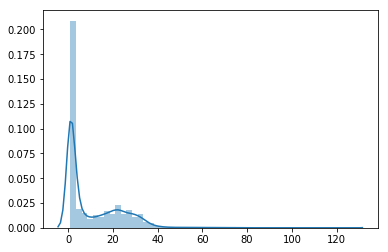

In [542]:
sns.distplot(ip_napp_yes)

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


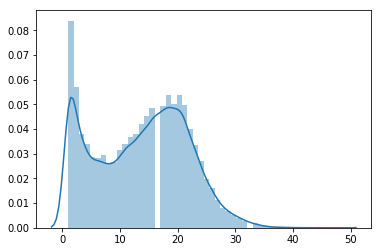

In [543]:
sns.distplot(ip_napp_no)

In [544]:
download_ip_df, ip_ndevice_yes, ip_ndevice_no = check_unique('ip', 'device')  

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


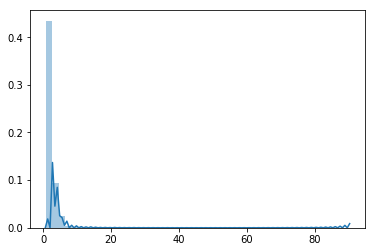

In [545]:
sns.distplot(ip_ndevice_yes)

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


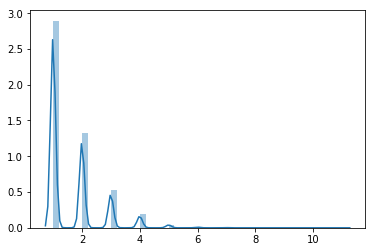

In [546]:
sns.distplot(ip_ndevice_no)

##### ip-[os]

In [547]:
download_ip_df, ip_nos_yes, ip_nos_no = check_unique('ip', 'os')  

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


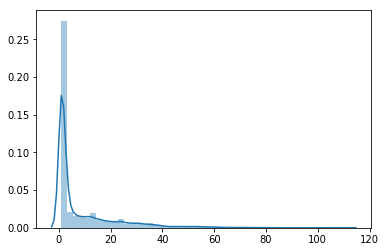

In [548]:
sns.distplot(ip_nos_yes)

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


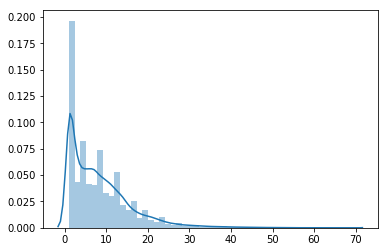

In [549]:
sns.distplot(ip_nos_no)

##### ip-[channel]

In [550]:
download_ip_df, ip_nchannel_yes, ip_nchannel_no = check_unique('ip', 'channel')  

In [560]:
ip_nchannel_yes['channel'].value_counts()

1      6722
2       952
3       457
4       398
5       274
6       174
7       170
76      138
78      137
8       132
79      130
80      123
77      123
9       109
74      109
51      104
81      103
75      100
82       96
73       96
50       95
10       93
53       93
55       92
13       91
58       90
11       90
16       87
72       87
59       86
12       85
44       85
47       85
70       85
71       84
54       82
56       82
46       81
63       81
62       79
48       79
15       78
69       78
52       77
61       77
66       77
42       75
57       74
64       73
68       72
67       71
24       71
49       71
27       70
45       70
83       68
41       67
17       67
19       67
22       66
60       65
34       64
37       64
43       64
84       64
25       63
14       63
32       62
36       61
29       61
65       61
40       60
33       60
30       57
21       57
31       57
26       56
39       55
18       55
20       54
35       53
38       52
28       47
23  

In [561]:
ip_nchannel_no['channel'].value_counts()

1     5020
2     2643
3     1831
4     1559
5     1210
6     1131
7     1083
8      910
9      850
12     818
44     799
48     792
47     786
14     782
45     780
15     778
10     777
42     776
46     769
11     767
37     761
43     760
40     760
39     759
13     747
20     741
36     738
41     734
38     734
50     727
49     725
16     724
52     718
26     715
51     715
34     713
35     711
21     708
28     704
32     698
18     698
19     697
31     695
27     694
22     687
33     686
25     682
53     681
29     677
17     673
24     672
30     667
23     650
54     604
55     596
57     548
56     529
58     478
59     465
61     407
60     399
62     353
63     319
64     291
65     250
66     244
68     229
67     225
72     208
73     176
70     173
71     170
69     165
76     157
75     154
74     142
77     118
78     105
79      89
80      71
81      62
82      39
83      21
85      15
84      13
86       9
87       4
88       1
89       1
91       1
92       1

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


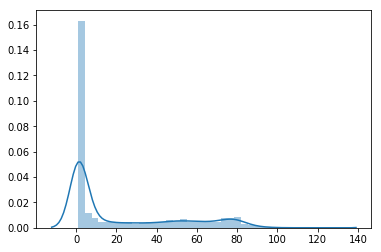

In [551]:
sns.distplot(ip_nchannel_yes)

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


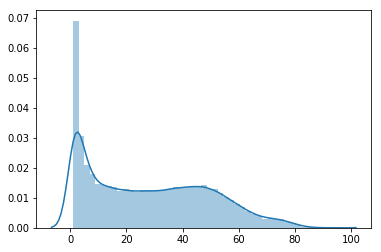

In [552]:
sns.distplot(ip_nchannel_no)

##### app [device]

In [553]:
download_app_df, app_ndevice_yes, app_ndevice_no = check_unique('app', 'device')  

In [557]:
app_ndevice_yes['device'].value_counts()

2      34
1      31
3      26
4      19
13      2
82      2
36      2
33      2
12      2
5       1
7       1
9       1
11      1
947     1
15      1
115     1
28      1
31      1
35      1
39      1
299     1
95      1
24      1
Name: device, dtype: int64

In [558]:
app_ndevice_no['device'].value_counts()

1     164
2      63
3       8
4       3
93      1
92      1
8       1
7       1
6       1
Name: device, dtype: int64

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


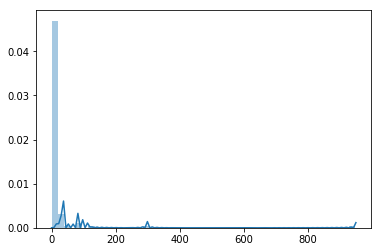

In [554]:
sns.distplot(app_ndevice_yes)

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


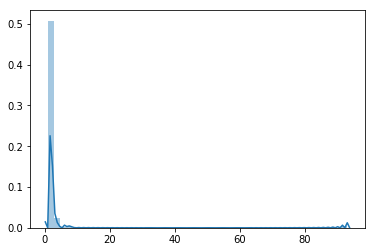

In [555]:
sns.distplot(app_ndevice_no)

##### app-[os]

In [564]:
download_app_df, app_nos_yes, app_nos_no = check_unique('app', 'os')  

In [565]:
app_nos_yes['os'].value_counts()

1      9
8      8
3      6
4      6
6      6
9      5
7      4
11     4
12     4
36     3
5      3
13     3
18     3
32     3
42     3
46     2
48     2
27     2
20     2
17     2
31     2
16     2
41     2
43     2
44     2
23     2
26     2
96     2
2      2
92     2
118    1
15     1
109    1
151    1
150    1
14     1
119    1
110    1
147    1
112    1
146    1
141    1
127    1
101    1
30     1
25     1
56     1
95     1
94     1
93     1
82     1
69     1
66     1
59     1
55     1
28     1
152    1
40     1
38     1
105    1
107    1
100    1
29     1
177    1
Name: os, dtype: int64

In [566]:
app_nos_no['os'].value_counts()

1     143
2      21
3      17
4      13
6       7
9       6
20      3
5       3
7       3
8       3
13      3
14      3
22      2
26      2
31      2
36      2
19      1
46      1
12      1
11      1
24      1
32      1
34      1
39      1
40      1
67      1
Name: os, dtype: int64

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


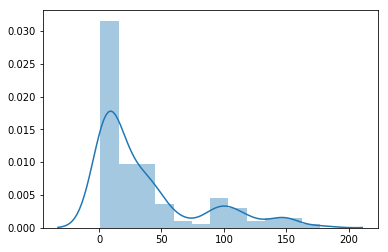

In [567]:
sns.distplot(app_nos_yes)

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


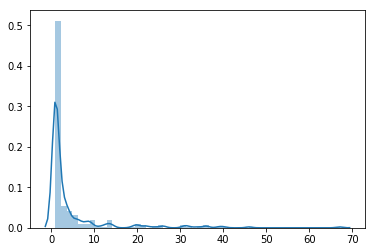

In [569]:
sns.distplot(app_nos_no)

##### app-[channel]

In [570]:
download_app_df, app_nchannel_yes, app_nchannel_no = check_unique('app', 'channel')  

In [572]:
app_nchannel_yes['channel'].value_counts(normalize = True)

1     0.440299
2     0.186567
3     0.104478
4     0.059701
5     0.059701
6     0.029851
7     0.022388
8     0.014925
11    0.007463
39    0.007463
33    0.007463
14    0.007463
19    0.007463
24    0.007463
26    0.007463
27    0.007463
28    0.007463
31    0.007463
13    0.007463
Name: channel, dtype: float64

In [573]:
app_nchannel_no['channel'].value_counts(normalize = True)

1    0.921811
2    0.065844
4    0.008230
3    0.004115
Name: channel, dtype: float64

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


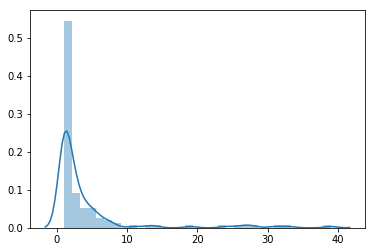

In [574]:
sns.distplot(app_nchannel_yes)

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


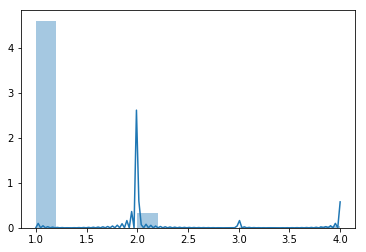

In [575]:
sns.distplot(app_nchannel_no)

##### ip-app-[channel]

In [17]:
def check_nunique2(groupby_col, n_col):
    download_feature = download[groupby_col]
    keys = groupby_col
    i1 = sample_train.set_index(keys).index
    i2 = download_feature.set_index(keys).index
    sample_yes = sample_train[i1.isin(i2)]
    sample_no = sample_train[~i1.isin(i2)]
    sample_yes_nunique = pd.DataFrame(sample_yes[groupby_col + [n_col]].groupby(groupby_col)[n_col].nunique())
    sample_no_nunique = pd.DataFrame(sample_no[groupby_col + [n_col]].groupby(groupby_col)[n_col].nunique())
    return sample_yes, sample_yes_nunique, sample_no_nunique

In [18]:
ipapp_yes, ipapp_yes_nchannel, ipapp_no_nchannel = check_nunique2(['ip', 'app'], 'channel')

In [20]:
ipapp_yes_nchannel['channel'].value_counts(normalize = True)

1     0.838043
2     0.063133
3     0.023931
4     0.019191
5     0.009537
10    0.008367
11    0.005266
9     0.005032
8     0.004856
6     0.003745
7     0.003745
12    0.002808
18    0.002633
13    0.002106
14    0.001931
19    0.001755
17    0.001580
20    0.000702
16    0.000644
15    0.000527
21    0.000234
22    0.000176
23    0.000059
Name: channel, dtype: float64

In [21]:
ipapp_no_nchannel['channel'].value_counts(normalize = True)

1     0.508403
2     0.169376
3     0.074343
4     0.057942
5     0.040798
6     0.031060
7     0.026536
8     0.022179
9     0.017711
10    0.014612
11    0.009948
12    0.007434
13    0.005841
14    0.004243
15    0.002966
16    0.002161
18    0.001916
17    0.001844
19    0.000555
20    0.000113
21    0.000007
22    0.000006
26    0.000002
27    0.000002
23    0.000001
24    0.000001
Name: channel, dtype: float64

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


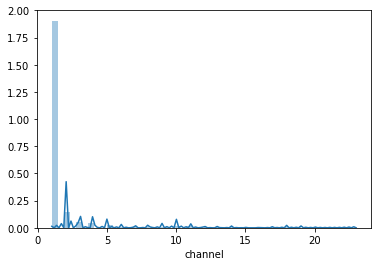

In [22]:
sns.distplot(ipapp_yes_nchannel['channel'])

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


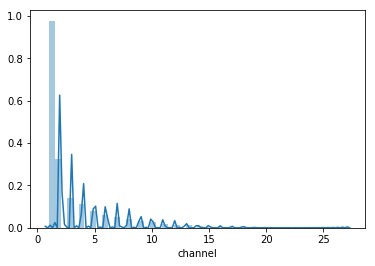

In [23]:
sns.distplot(ipapp_no_nchannel['channel'])

##### ip-app [os]

In [24]:
ipapp_yes, ipapp_yes_nos, ipapp_no_nos = check_nunique2(['ip', 'app'], 'os')

In [26]:
ipapp_yes_nos['os'].value_counts(normalize = True)

1     0.771634
2     0.087239
3     0.033000
4     0.017027
5     0.010590
6     0.008777
7     0.006553
9     0.004915
8     0.004271
11    0.002867
13    0.002808
10    0.002808
12    0.002633
15    0.002516
14    0.002457
16    0.002165
18    0.002165
19    0.001931
17    0.001872
22    0.001580
30    0.001580
21    0.001521
23    0.001521
31    0.001463
44    0.001404
20    0.001346
25    0.001170
24    0.001112
35    0.001112
28    0.000995
        ...   
39    0.000644
33    0.000585
26    0.000585
41    0.000527
47    0.000468
50    0.000410
49    0.000410
57    0.000410
45    0.000351
55    0.000351
48    0.000351
51    0.000293
53    0.000293
56    0.000293
54    0.000293
52    0.000234
58    0.000176
66    0.000117
70    0.000117
59    0.000117
71    0.000117
67    0.000117
68    0.000117
77    0.000059
65    0.000059
82    0.000059
76    0.000059
62    0.000059
80    0.000059
72    0.000059
Name: os, Length: 71, dtype: float64

In [27]:
ipapp_no_nos['os'].value_counts(normalize = True)

1     0.431896
2     0.183122
3     0.110623
4     0.074025
5     0.051446
6     0.036063
7     0.025797
8     0.018480
9     0.013363
10    0.010156
11    0.007613
12    0.006060
13    0.004865
14    0.003907
15    0.003251
16    0.002649
17    0.002260
18    0.002010
19    0.001624
20    0.001429
21    0.001158
22    0.001026
23    0.000818
24    0.000686
25    0.000618
26    0.000491
27    0.000461
28    0.000383
29    0.000325
30    0.000315
        ...   
42    0.000116
41    0.000101
45    0.000097
44    0.000087
47    0.000063
46    0.000062
48    0.000059
49    0.000046
50    0.000038
51    0.000037
52    0.000029
53    0.000027
55    0.000020
56    0.000017
54    0.000013
57    0.000012
58    0.000009
59    0.000009
62    0.000009
60    0.000004
63    0.000004
61    0.000003
64    0.000002
66    0.000002
67    0.000002
69    0.000001
71    0.000001
72    0.000001
68    0.000001
73    0.000001
Name: os, Length: 71, dtype: float64

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


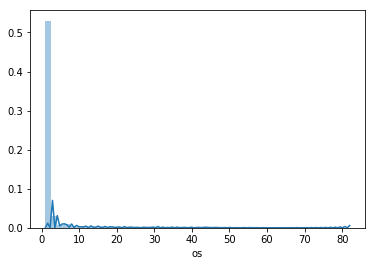

In [29]:
sns.distplot(ipapp_yes_nos['os'])

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


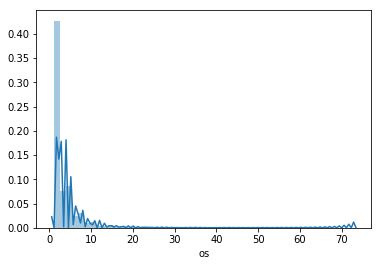

In [30]:
sns.distplot(ipapp_no_nos['os'])

##### ip-app-[device]

In [31]:
ipapp_yes, ipapp_yes_ndevice, ipapp_no_ndevice = check_nunique2(['ip', 'app'], 'device')

In [32]:
ipapp_yes_ndevice['device'].value_counts(normalize = True)

1     0.886841
2     0.086595
3     0.016324
4     0.003862
5     0.001580
6     0.001053
7     0.000761
8     0.000527
9     0.000468
10    0.000410
11    0.000351
14    0.000293
12    0.000293
15    0.000117
13    0.000117
38    0.000059
30    0.000059
20    0.000059
75    0.000059
28    0.000059
18    0.000059
71    0.000059
Name: device, dtype: float64

In [33]:
ipapp_no_ndevice['device'].value_counts(normalize = True)

1     0.916594
2     0.080789
3     0.002504
4     0.000093
5     0.000012
9     0.000002
6     0.000002
14    0.000001
8     0.000001
7     0.000001
Name: device, dtype: float64

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


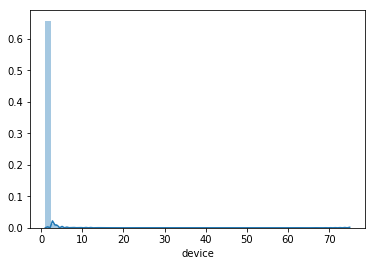

In [35]:
sns.distplot(ipapp_yes_ndevice.device)

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


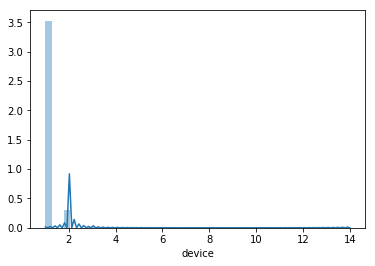

In [36]:
sns.distplot(ipapp_no_ndevice['device'])

##### ip-device-os-[app]

In [37]:
ido_yes, ido_yes_napp, ido_no_napp = check_nunique2(['ip', 'device', 'os'], 'app')

In [38]:
ido_yes_napp['app'].value_counts(normalize = True)

1     0.742969
2     0.031378
3     0.018418
4     0.012683
5     0.010036
13    0.009540
17    0.009375
18    0.009375
14    0.009320
12    0.009320
15    0.009264
16    0.009154
19    0.008713
11    0.008382
21    0.008106
22    0.007941
10    0.007886
9     0.007831
23    0.007610
6     0.007555
25    0.007389
20    0.007279
7     0.007114
24    0.006728
8     0.006287
26    0.005184
27    0.004301
28    0.003088
29    0.002757
30    0.001489
31    0.001213
32    0.000607
34    0.000331
33    0.000331
35    0.000276
40    0.000276
37    0.000110
48    0.000110
41    0.000055
36    0.000055
45    0.000055
46    0.000055
38    0.000055
Name: app, dtype: float64

In [39]:
ido_no_napp['app'].value_counts(normalize = True)

1     0.304802
2     0.178571
3     0.093516
4     0.067750
5     0.050113
6     0.043700
7     0.036919
8     0.032493
9     0.029341
10    0.027852
11    0.026484
12    0.023995
13    0.020265
14    0.016572
15    0.012894
16    0.009692
17    0.007148
18    0.004985
19    0.003546
20    0.002725
21    0.001976
22    0.001489
23    0.001131
24    0.000765
25    0.000532
26    0.000344
27    0.000160
28    0.000108
29    0.000058
31    0.000024
30    0.000019
32    0.000011
34    0.000008
37    0.000003
35    0.000003
39    0.000002
46    0.000002
33    0.000002
48    0.000002
Name: app, dtype: float64

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


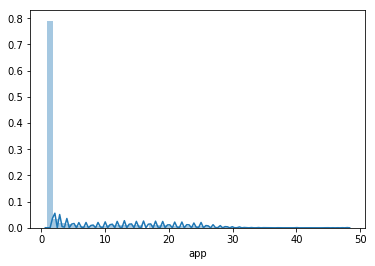

In [40]:
sns.distplot(ido_yes_napp['app'])

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


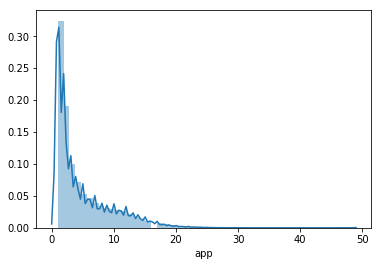

In [42]:
sns.distplot(ido_no_napp['app'])

##### ip-device-os-app-[channel]

In [43]:
idoa_yes, idoa_yes_nchannel, idoa_no_nchannel = check_nunique2(['ip', 'device', 'os', 'app'], 'channel')

In [44]:
idoa_yes_nchannel['channel'].value_counts(normalize = True)

1     0.898926
2     0.041562
3     0.018110
4     0.014103
5     0.004755
6     0.003793
9     0.002938
8     0.002778
11    0.002511
7     0.002457
10    0.002297
18    0.001389
12    0.000801
14    0.000748
19    0.000748
13    0.000694
17    0.000588
16    0.000374
15    0.000267
20    0.000160
Name: channel, dtype: float64

In [45]:
idoa_no_nchannel['channel'].value_counts(normalize = True)

1     7.073048e-01
2     1.528969e-01
3     6.220519e-02
4     3.171270e-02
5     1.633199e-02
6     9.958714e-03
7     6.382798e-03
8     4.253338e-03
9     2.772074e-03
10    1.940321e-03
11    1.299020e-03
12    9.148305e-04
13    6.830034e-04
14    4.935356e-04
15    2.873211e-04
16    1.927514e-04
17    1.589296e-04
18    1.457949e-04
19    5.450892e-05
20    8.209175e-06
21    1.313468e-06
24    9.851010e-07
25    3.283670e-07
22    3.283670e-07
26    3.283670e-07
Name: channel, dtype: float64

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


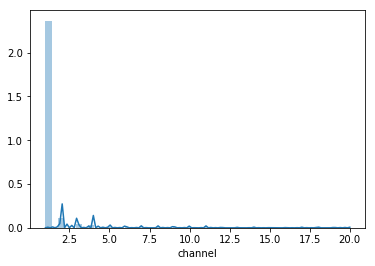

In [46]:
sns.distplot(idoa_yes_nchannel.channel)

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


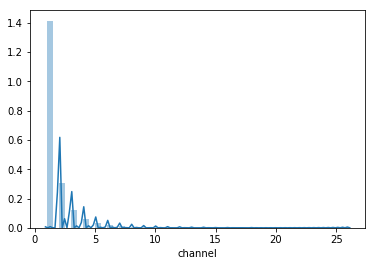

In [48]:
sns.distplot(idoa_no_nchannel.channel)

nunique-count feature
* ip [app]
* ip [device]
* ip [os]
* ip [channel]
* app [os]
* app [channel]
* ip, app [os]
* ip, app [device]
* ip, device, os [app]
* ip, day [hour]

In [56]:
sample_train2 = sample_train.copy()

In [58]:
def count_nunique(groupby_col, n_col, newname):
    ncol_count = pd.DataFrame(sample_train[groupby_col + [n_col]].groupby(groupby_col)[n_col].nunique()).reset_index()
    ncol_count.rename(columns={n_col: newname}, inplace = True)
    df = pd.merge(sample_train2, ncol_count, on = groupby_col)
    return df

In [60]:
sample_train2 = count_nunique(['ip'], 'app', 'app_nunique(ip)')

In [62]:
sample_train2 = count_nunique(['ip'], 'device', 'device_nunique(ip)')

In [63]:
sample_train2 = count_nunique(['ip'], 'os', 'os_nunique(ip)')

In [64]:
sample_train2 = count_nunique(['ip'], 'channel', 'channel_nunique(ip)')

In [65]:
sample_train2 = count_nunique(['app'], 'os', 'os_nunique(app)')

In [66]:
sample_train2 = count_nunique(['app'], 'channel', 'channel_nunique(app)')

In [67]:
sample_train2 = count_nunique(['ip', 'app'], 'os', 'os_nunique(ipapp)')

In [68]:
sample_train2 = count_nunique(['ip', 'app'], 'device', 'device_nunique(ipapp)')

In [69]:
sample_train2 = count_nunique(['ip', 'device', 'os'], 'app', 'app_nunique(ido)')

In [70]:
sample_train2 = count_nunique(['ip', 'day'], 'hour', 'hour_nunique(ipday)')

In [71]:
sample_train2.shape

(9261057, 38)

### previous-click time

* day, ip, app - previous click time

(* day, ip, app, channel - previous click time
* day, ip, device, os - previous click time
* day, ip, device, os, app - previous click time
* day, ip, device, os, app, channel - previous click time)

In [252]:
def check_prev_clicktime(groupby_col):
    download_feature = download[groupby_col]
    keys = groupby_col
    i1 = sample_train.set_index(keys).index
    i2 = download_feature.set_index(keys).index
    sample_yes = sample_train[i1.isin(i2)]
    sample_no = sample_train[~i1.isin(i2)]
    a_yes = sample_yes[groupby_col + ['click_time']].groupby(groupby_col).click_time.shift(-1)
    a_yes = a_yes.fillna('2000-01-01 12:00:00')
    a_yes = a_yes.apply(lambda x: datetime.strptime(str(x), fmt))
    b_yes = sample_yes.click_time.apply(lambda x: datetime.strptime(str(x), fmt))
    sample_yes_clicktime = (a_yes - b_yes).apply(lambda x: x.seconds)
    
    c_no = sample_no[groupby_col + ['click_time']].groupby(groupby_col).click_time.shift(-1)
    c_no = c_no.fillna('2000-01-01 12:00:00')
    c_no = c_no.apply(lambda x: datetime.strptime(str(x), fmt))
    d_no = sample_no.click_time.apply(lambda x: datetime.strptime(str(x), fmt))
    sample_no_clicktime = (c_no - d_no).apply(lambda x: x.seconds)
    
    return sample_yes_clicktime, sample_no_clicktime

In [289]:
a = sample_train[['device', 'os','ip', 'app', 'click_time', 'is_attributed']]

In [290]:
a.sort_values(['device', 'os', 'ip', 'app', 'click_time'], ascending = False)

device   os      ip  app           click_time  is_attributed
4644944    3543  748   74638   42  2017-11-07 14:25:50              0
4835016    3543  748    5348   42  2017-11-07 14:29:24              0
2724428    3542    0  212004   19  2017-11-07 13:50:45              0
2723517    3542    0  212004   19  2017-11-07 13:50:44              0
2524923    3535   24  209930   19  2017-11-07 13:47:06              0
1752065    3526   38   28584   19  2017-11-07 13:33:00              1
747051     3519   24  207281   19  2017-11-07 13:14:04              0
938625     3519   24    4324   19  2017-11-07 13:17:45              0
921975     3519   24    4324   19  2017-11-07 13:17:26              0
6329624    3516   59   84774   19  2017-11-07 14:58:36              0
7688038    3505  135  205482   19  2017-11-07 15:25:37              0
6746498    3505  135  205482   19  2017-11-07 15:06:28              1
6739364    3505  135  205482   19  2017-11-07 15:06:21              0
7725795    3493   24  202556   19  2017-11-07 15:26:23              0
124796     3488   38  119349   19  2017-11-07 13:02:07              0
3764344    3487   59  201829   84  2017-11-07 14:09:29              1
3740629    3487   59  201829   84  2017-11-07 14:09:01              0
6128371    3484   38   44725  136  2017-11-07 14:54:31              0
6645048    3473   38  197393   83  2017-11-07 15:04:33              0
7057519    3473   38  197393   46  2017-11-07 15:12:40              0
5773585    3468    0  197023   19  2017-11-07 14:47:27              1
7143770    3466  104   32976   19  2017-11-07 15:14:24              0
464713     3464   91  195958   83  2017-11-07 13:08:33              0
6112767    3461    0   84896   19  2017-11-07 14:54:12              0
4575486    3459   50  113033   19  2017-11-07 14:24:29              0
3334034    3448    0   88283   83  2017-11-07 14:01:33              0
1924401    3447  104  192099   50  2017-11-07 13:36:08              0
5316951    3446   29  125146   84  2017-11-07 14:38:38              0
5858021    3441   29  191055   83  2017-11-07 14:49:06              0
1350242    3438   24  190594  120  2017-11-07 13:25:31              1
3279349    3436    0  190329   83  2017-11-07 14:00:36              0
1728276    3425  104   79857   19  2017-11-07 13:32:34              0
7872742    3421   24   68279   19  2017-11-07 15:29:28              0
7863119    3421   24   68279   19  2017-11-07 15:29:16              0
7862284    3421   24   68279   19  2017-11-07 15:29:15              0
9231711    3419   24  112864   83  2017-11-07 15:59:21              0
9231809    3419   24  112864   83  2017-11-07 15:59:21              0
1212641    3416    0  108661   46  2017-11-07 13:22:53              0
4367647    3409   38   52024   19  2017-11-07 14:20:38              0
4352342    3409   38   52024   19  2017-11-07 14:20:21              0
6921867    3406   24  184408  145  2017-11-07 15:09:56              0
7451844    3405    0   58766   19  2017-11-07 15:20:43              0
7443025    3405    0   58766   19  2017-11-07 15:20:33              0
2660767    3403   38  183474   19  2017-11-07 13:49:33              1
2660267    3403   38  183474   19  2017-11-07 13:49:32              0
5107900    3387   38  114596  117  2017-11-07 14:34:34              0
2135909    3382   84   57642   19  2017-11-07 13:39:57              0
999336     3381   38  116320   83  2017-11-07 13:18:54              0
999407     3381   38  116320   83  2017-11-07 13:18:54              0
4330236    3375    0  179347   96  2017-11-07 14:19:56              1
6733024    3371   24   83256   19  2017-11-07 15:06:14              0
6730795    3371   24   83256   19  2017-11-07 15:06:12              0
6731381    3371   24   83256   19  2017-11-07 15:06:12              0
8926561    3368    0  178305   19  2017-11-07 15:52:23              1
8914027    3368    0  178305   19  2017-11-07 15:52:07              0
8898559    3368    0  178305   19  2017-11-07 15:51:49              0
5261312    3367   9

In [256]:
ido_yes_pct, ido_no_pct = check_prev_clicktime(['ip', 'device', 'os'])

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


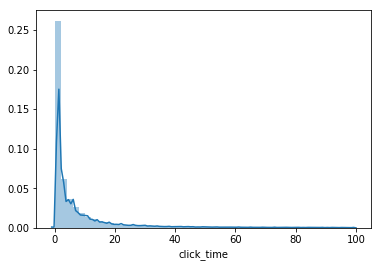

In [274]:
sns.distplot(ido_yes_pct[ido_yes_pct < 100])

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


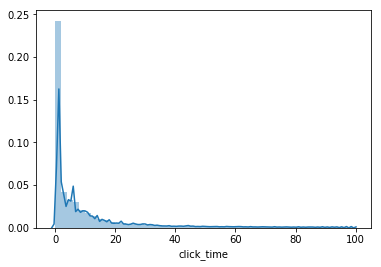

In [275]:
sns.distplot(ido_no_pct[ido_no_pct < 100])

In [269]:
ipchannel_yes_pct, ipchannel_no_pct = check_prev_clicktime(['ip', 'channel'])

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


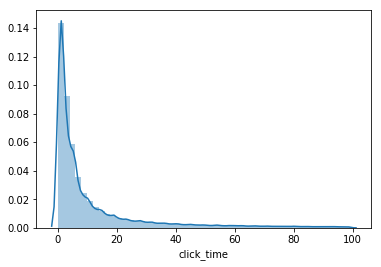

In [272]:
sns.distplot(ipchannel_yes_pct[ipchannel_yes_pct < 100])

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


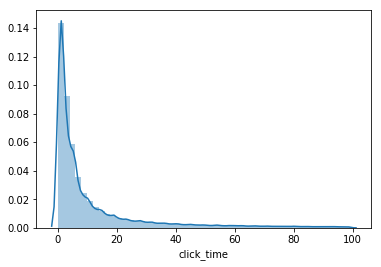

In [273]:
sns.distplot(ipchannel_yes_pct[ipchannel_yes_pct < 100])

In [276]:
ipapp_yes_pct, ipapp_no_pct = check_prev_clicktime(['ip', 'app'])

In [279]:
ipapp_yes_pct

56             1
87           877
99             9
100            4
101            0
130           13
144            1
147          386
151          664
153            3
169           43
191            2
220            4
224         1706
249           65
265            7
269            1
295            8
333          297
361            5
368           14
396           28
432            2
463         1521
499           16
523            9
548            7
556            0
575            0
588        82800
625            0
630          282
634           11
640            0
641            4
643         1382
647            1
668         1628
722            1
736            3
758            1
779           28
799          555
823            0
829            0
831        82799
874           52
888           17
907            3
974           50
977            0
992           19
995            2
1047          59
1067           0
1101           0
1104          23
1122          54
1137          

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


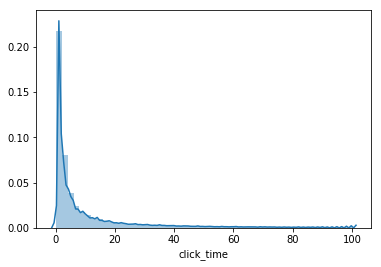

In [280]:
sns.distplot(ipapp_yes_pct[ipapp_yes_pct <= 100])

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


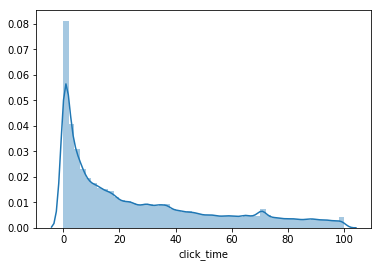

In [281]:
sns.distplot(ipapp_no_pct[ipapp_no_pct <= 100])

In [270]:
# def check_prev_clicktime2(groupby_col):
#     download_feature = download[groupby_col]
#     keys = groupby_col
#     i1 = sample_train.set_index(keys).index
#     i2 = download_feature.set_index(keys).index
#     sample_yes = sample_train[i1.isin(i2)]
#     sample_no = sample_train[~i1.isin(i2)]
#     a_yes = sample_yes[groupby_col + ['click_time']].groupby(groupby_col).click_time.shift(-1)
#     a_yes = a_yes.fillna('2000-01-01 12:00:00')
#     a_yes = a_yes.apply(lambda x: datetime.strptime(str(x), fmt))
#     b_yes = sample_yes.click_time.apply(lambda x: datetime.strptime(str(x), fmt))
#     sample_yes_clicktime = (a_yes - b_yes).apply(lambda x: x.seconds)
#     return sample_yes, a_yes, b_yes

### time range

* ip-device-os-app click-time.max() - click-time.min()
* ip-device-os-app-channel click-time.max() - click-time.min()

In [264]:
sample_yes, a, b = check_prev_clicktime2(['ip', 'device', 'os'])

In [268]:
sample_yes[['ip','device', 'os'] + ['click_time']].groupby(['ip', 'device', 'os']).click_time.shift(-1)

18         2017-11-07 13:00:06
30         2017-11-07 13:00:00
35         2017-11-07 13:00:00
36         2017-11-07 13:00:01
41         2017-11-07 13:00:03
50         2017-11-07 13:00:00
57         2017-11-07 13:00:01
66         2017-11-07 13:00:05
75         2017-11-07 13:00:00
89         2017-11-07 13:00:00
97         2017-11-07 13:00:03
100        2017-11-07 13:00:31
108        2017-11-07 13:00:01
123        2017-11-07 13:00:00
128        2017-11-07 13:00:14
132        2017-11-07 13:00:00
133        2017-11-07 13:00:00
144        2017-11-07 13:00:00
151                        NaN
153        2017-11-07 13:00:00
154        2017-11-07 13:00:00
169        2017-11-07 13:00:43
191        2017-11-07 13:00:00
220        2017-11-07 13:00:01
224        2017-11-07 14:12:24
226        2017-11-07 13:10:19
233        2017-11-07 13:00:00
251        2017-11-07 13:00:01
258        2017-11-07 13:00:01
269        2017-11-07 13:00:00
294        2017-11-07 13:00:02
314        2017-11-07 13:00:00
331     

In [261]:
sample_yes[groupby_col + ['click_time']].groupby(groupby_col).click_time.shift(-1)

18        2017-11-07 13:00:06
30        2017-11-07 13:00:00
35        2017-11-07 13:00:00
36        2017-11-07 13:00:01
41        2017-11-07 13:00:03
50        2017-11-07 13:00:00
57        2017-11-07 13:00:01
66        2017-11-07 13:00:05
75        2017-11-07 13:00:00
89        2017-11-07 13:00:00
97        2017-11-07 13:00:03
100       2017-11-07 13:00:31
108       2017-11-07 13:00:01
123       2017-11-07 13:00:00
128       2017-11-07 13:00:14
132       2017-11-07 13:00:00
133       2017-11-07 13:00:00
144       2017-11-07 13:00:00
151       2000-01-01 12:00:00
153       2017-11-07 13:00:00
154       2017-11-07 13:00:00
169       2017-11-07 13:00:43
191       2017-11-07 13:00:00
220       2017-11-07 13:00:01
224       2017-11-07 14:12:24
226       2017-11-07 13:10:19
233       2017-11-07 13:00:00
251       2017-11-07 13:00:01
258       2017-11-07 13:00:01
269       2017-11-07 13:00:00
294       2017-11-07 13:00:02
314       2017-11-07 13:00:00
331       2017-11-07 13:00:00
343       

In [262]:
b

18        2017-11-07 13:00:00
30        2017-11-07 13:00:00
35        2017-11-07 13:00:00
36        2017-11-07 13:00:00
41        2017-11-07 13:00:00
50        2017-11-07 13:00:00
57        2017-11-07 13:00:00
66        2017-11-07 13:00:00
75        2017-11-07 13:00:00
89        2017-11-07 13:00:00
97        2017-11-07 13:00:00
100       2017-11-07 13:00:00
108       2017-11-07 13:00:00
123       2017-11-07 13:00:00
128       2017-11-07 13:00:00
132       2017-11-07 13:00:00
133       2017-11-07 13:00:00
144       2017-11-07 13:00:00
151       2017-11-07 13:00:00
153       2017-11-07 13:00:00
154       2017-11-07 13:00:00
169       2017-11-07 13:00:00
191       2017-11-07 13:00:00
220       2017-11-07 13:00:00
224       2017-11-07 13:00:00
226       2017-11-07 13:00:00
233       2017-11-07 13:00:00
251       2017-11-07 13:00:00
258       2017-11-07 13:00:00
269       2017-11-07 13:00:00
294       2017-11-07 13:00:00
314       2017-11-07 13:00:00
331       2017-11-07 13:00:00
343       

### time range

* day, ip, device, os, app [click_time.max() - click_time.min()]

In [214]:
ido_nct_yes, ido_nct_no = check_prev_clicktime(['ip', 'device', 'os'])

In [103]:
from datetime import datetime

In [161]:
fmt = '%Y-%m-%d %H:%M:%S'
from_date = '2013-09-01 12:23:23'    
to_date = '2013-09-30 12:24:24'  

In [164]:
d1 = datetime.strptime(from_date, fmt)
d2 = datetime.strptime(to_date, fmt)

In [165]:
daysDiff = (d2-d1).seconds
daysDiff

61

In [125]:
a= sample_train2.groupby(['ip', 'app', 'device', 'os']).click_time.shift(-1)
a = a.fillna('-00-00')

In [144]:
a = sample_train2.click_time

In [187]:
d = sample_train2[['ip', 'app', 'device', 'os', 'channel', 'click_time']].groupby(['ip', 'app', 'device', 'os', 'channel']).click_time.shift(-1)

In [176]:
b = b.fillna('2000-01-01 12:00:00')

In [181]:
(a.apply(lambda x: datetime.strptime(str(x), fmt)) - b.apply(lambda x: datetime.strptime(str(x), fmt)))

0         6520 days 01:00:00
1            0 days 00:00:00
2         6520 days 01:00:00
3          -1 days +23:59:34
4         6520 days 02:01:02
5          -1 days +23:59:27
6         6520 days 02:00:59
7         6520 days 01:22:08
8         6520 days 01:23:23
9         6520 days 01:22:54
10        6520 days 01:22:08
11        6520 days 01:24:01
12         -1 days +23:59:25
13         -1 days +23:55:18
14        6520 days 01:23:38
15        6520 days 01:27:17
16        6520 days 01:22:09
17        6520 days 01:22:47
18        6520 days 01:23:24
19        6520 days 01:23:33
20        6520 days 01:23:49
21        6520 days 01:51:25
22        6520 days 01:03:56
23        6520 days 01:03:55
24        6520 days 01:05:36
25        6520 days 01:58:37
26         -1 days +23:58:09
27         -1 days +23:30:18
28        6520 days 02:15:07
29         -1 days +23:50:54
30         -1 days +23:47:36
31        6520 days 02:04:54
32        6520 days 01:47:59
33         -1 days +23:08:37
34         -1 

In [171]:
(datetime.strptime(a.iloc[1], fmt) - datetime.strptime(b.iloc[1], fmt)).seconds

0

In [183]:
a = a.apply(lambda x: datetime.strptime(str(x), fmt))

In [184]:
a

0         2017-11-07 13:00:00
1         2017-11-07 13:00:00
2         2017-11-07 13:00:00
3         2017-11-07 14:00:36
4         2017-11-07 14:01:02
5         2017-11-07 14:00:26
6         2017-11-07 14:00:59
7         2017-11-07 13:22:08
8         2017-11-07 13:23:23
9         2017-11-07 13:22:54
10        2017-11-07 13:22:08
11        2017-11-07 13:24:01
12        2017-11-07 13:22:00
13        2017-11-07 13:22:35
14        2017-11-07 13:23:38
15        2017-11-07 13:27:17
16        2017-11-07 13:22:09
17        2017-11-07 13:22:47
18        2017-11-07 13:23:24
19        2017-11-07 13:23:33
20        2017-11-07 13:23:49
21        2017-11-07 13:51:25
22        2017-11-07 13:03:56
23        2017-11-07 13:03:55
24        2017-11-07 13:05:36
25        2017-11-07 13:58:37
26        2017-11-07 13:43:34
27        2017-11-07 13:45:25
28        2017-11-07 14:15:07
29        2017-11-07 13:43:24
30        2017-11-07 13:52:30
31        2017-11-07 14:04:54
32        2017-11-07 13:47:59
33        

In [185]:
c = sample_train2.click_time

In [186]:
c

0          2017-11-07 13:00:00
1          2017-11-07 13:00:00
2          2017-11-07 13:00:00
3          2017-11-07 14:00:36
4          2017-11-07 14:01:02
5          2017-11-07 14:00:26
6          2017-11-07 14:00:59
7          2017-11-07 13:22:08
8          2017-11-07 13:23:23
9          2017-11-07 13:22:54
10         2017-11-07 13:22:08
11         2017-11-07 13:24:01
12         2017-11-07 13:22:00
13         2017-11-07 13:22:35
14         2017-11-07 13:23:38
15         2017-11-07 13:27:17
16         2017-11-07 13:22:09
17         2017-11-07 13:22:47
18         2017-11-07 13:23:24
19         2017-11-07 13:23:33
20         2017-11-07 13:23:49
21         2017-11-07 13:51:25
22         2017-11-07 13:03:56
23         2017-11-07 13:03:55
24         2017-11-07 13:05:36
25         2017-11-07 13:58:37
26         2017-11-07 13:43:34
27         2017-11-07 13:45:25
28         2017-11-07 14:15:07
29         2017-11-07 13:43:24
30         2017-11-07 13:52:30
31         2017-11-07 14:04:54
32      

In [190]:
e = d.fillna('2000-01-01 12:00:00').apply(lambda x: datetime.strptime(str(x), fmt))

In [197]:
a.iloc[3]

Timestamp('2017-11-07 14:00:36')

In [198]:
e.iloc[3]

Timestamp('2017-11-07 14:01:02')

In [203]:
(e - a).apply(lambda x: x.seconds)

0          82800
1              0
2          82800
3             26
4          79138
5             33
6          79141
7          81472
8          81397
9          81426
10         81472
11         81359
12            35
13           282
14         81382
15         81163
16         81471
17         81433
18         81396
19         81387
20         81371
21         79715
22         82564
23         82565
24         82464
25         79283
26           111
27          1782
28         78293
29           546
30           744
31         78906
32         79921
33          3083
34          1482
35         76445
36         76409
37         75024
38            15
39         72275
40         76469
41         75009
42            16
43         72275
44         72270
45         79588
46         76500
47         76415
48         75023
49           438
50         73831
51         79586
52         76409
53         75022
54          5283
55         76510
56         76429
57         75020
58         795